In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import operator
import scipy as sp
from sklearn import preprocessing
import json

In [4]:
data_location_AT = [r"D:\Storage\Research\data\ATER",
                 r"D:\Storage\Research\data\ATERDD",
                 r"D:\Storage\Research\data\ATGEO",
                 r"D:\Storage\Research\data\ATGEOGD",
                 r"D:\Storage\Research\data\ATHGG",
                 r"D:\Storage\Research\data\ATSF",
                 r"D:\Storage\Research\data\ATSFDD",
                 r"D:\Storage\Research\data\ATSticky",
                 r"D:\Storage\Research\data\ATOriginal"]

In [5]:
data_location_CE = [r"D:\Storage\Research\data\CEER",
                 r"D:\Storage\Research\data\CEERDD",
                 r"D:\Storage\Research\data\CEGEO",
                 r"D:\Storage\Research\data\CEGEOGD",
                 r"D:\Storage\Research\data\CEHGG",
                 r"D:\Storage\Research\data\CESF",
                 r"D:\Storage\Research\data\CESFDD",
                 r"D:\Storage\Research\data\CESticky",
                 r"D:\Storage\Research\data\CEOriginal"]

In [6]:
data_location_DM = [r"D:\Storage\Research\data\DMER",
                 r"D:\Storage\Research\data\DMERDD",
                 r"D:\Storage\Research\data\DMGEO",
                 r"D:\Storage\Research\data\DMGEOGD",
                 r"D:\Storage\Research\data\DMHGG",
                 r"D:\Storage\Research\data\DMSF",
                 r"D:\Storage\Research\data\DMSFDD",
                 r"D:\Storage\Research\data\DMSticky",
                 r"D:\Storage\Research\data\DMOriginal"]

In [7]:
data_location_EC = [r"D:\Storage\Research\data\ECER",
                 r"D:\Storage\Research\data\ECERDD",
                 r"D:\Storage\Research\data\ECGEO",
                 r"D:\Storage\Research\data\ECGEOGD",
                 r"D:\Storage\Research\data\ECHGG",
                 r"D:\Storage\Research\data\ECSF",
                 r"D:\Storage\Research\data\ECSFDD",
                 r"D:\Storage\Research\data\ECSticky",
                 r"D:\Storage\Research\data\ECOriginal"]

In [8]:
data_location_HS = [r"D:\Storage\Research\data\HSER",
                 r"D:\Storage\Research\data\HSERDD",
                 r"D:\Storage\Research\data\HSGEO",
                 r"D:\Storage\Research\data\HSGEOGD",
                 r"D:\Storage\Research\data\HSHGG",
                 r"D:\Storage\Research\data\HSSF",
                 r"D:\Storage\Research\data\HSSFDD",
                 r"D:\Storage\Research\data\HSSticky",
                 r"D:\Storage\Research\data\HSOriginal"]

In [9]:
data_location_MM = [r"D:\Storage\Research\data\MMER",
                 r"D:\Storage\Research\data\MMERDD",
                 r"D:\Storage\Research\data\MMGEO",
                 r"D:\Storage\Research\data\MMGEOGD",
                 r"D:\Storage\Research\data\MMHGG",
                 r"D:\Storage\Research\data\MMSF",
                 r"D:\Storage\Research\data\MMSFDD",
                 r"D:\Storage\Research\data\MMSticky",
                 r"D:\Storage\Research\data\MMOriginal"]

In [10]:
data_location_RN = [r"D:\Storage\Research\data\RNER",
                 r"D:\Storage\Research\data\RNERDD",
                 r"D:\Storage\Research\data\RNGEO",
                 r"D:\Storage\Research\data\RNGEOGD",
                 r"D:\Storage\Research\data\RNHGG",
                 r"D:\Storage\Research\data\RNSF",
                 r"D:\Storage\Research\data\RNSFDD",
                 r"D:\Storage\Research\data\RNSticky",
                 r"D:\Storage\Research\data\RNOriginal"]

In [11]:
data_location_SC = [r"D:\Storage\Research\data\SCER",
                 r"D:\Storage\Research\data\SCERDD",
                 r"D:\Storage\Research\data\SCGEO",
                 r"D:\Storage\Research\data\SCGEOGD",
                 r"D:\Storage\Research\data\SCHGG",
                 r"D:\Storage\Research\data\SCSF",
                 r"D:\Storage\Research\data\SCSFDD",
                 r"D:\Storage\Research\data\SCSticky",
                 r"D:\Storage\Research\data\SCOriginal"]

In [12]:
data_location_SP = [r"D:\Storage\Research\data\SPER",
                 r"D:\Storage\Research\data\SPERDD",
                 r"D:\Storage\Research\data\SPGEO",
                 r"D:\Storage\Research\data\SPGEOGD",
                 r"D:\Storage\Research\data\SPHGG",
                 r"D:\Storage\Research\data\SPSF",
                 r"D:\Storage\Research\data\SPSFDD",
                 r"D:\Storage\Research\data\SPSticky",
                 r"D:\Storage\Research\data\SPOriginal"]

In [13]:
def distance(origin, other):
    return np.sum((origin - other) ** 2)**(1/2)

def read_data(path, header = None, seperator = ' '):
    return pd.read_csv(path, header = header, sep = seperator).iloc[:,:].values

def volume(dimensions, radius):
    return np.pi**(dimensions/2) * radius ** dimensions/ sp.special.gamma(dimensions/2 +1)

def customScaling(distances, scale = (1/3)):
    return distances ** scale



In [34]:
class Distance_classifier():
    
    def __init__(self, model = "auto"):
        pass
    
    def __init__(self, X, y, model = "gamma", threshold = .00, kd_tree = False):
        self.kd = kd_tree
        self.data = X
        self.labels = y
        self.model = model
        self.threshold = threshold
    
    def distances(self, data):
        zeros = 0
        short_dist = defaultdict(int)
        for i in range(len(self.data)):
            expect_dist = distance(data, self.data[i])
            if expect_dist > 0 and (short_dist[self.labels[i]] > expect_dist or short_dist[self.labels[i]] == 0):
                short_dist[self.labels[i]] = expect_dist
            elif expect_dist == 0:
                zeros += 1
#         for key, b in short_dist.items():
#             if b == 0:
#                 print("For label", key, "there is a distance", 0, "for data:", data)
        if zeros != 1:
            print("found", zeros, "points with distance of 0")
        return short_dist
    
    def fit(self, X = None, y = None, test = True):
        
        def find_outliers(dataset, outlier_constant = 1.5):
            #defintion of outlier w/ 1.5 iqr definition
            upper_quartile = np.percentile(dataset, 75)
            lower_quartile = np.percentile(dataset, 25)
            IQR = (upper_quartile - lower_quartile) * outlier_constant
            outliers = dataset[dataset >= upper_quartile + IQR]
            non_outliers = dataset[dataset < upper_quartile + IQR]
            print(outliers)
            return outliers, non_outliers
#             pass
        
        def add_secondary():
            # creating secondary distribution for outliers
            self.secondary_dist = [None for i in range(len(self.labels))] #the secondary distribution is a expo dist
            for label in self.distance.keys(): 
                #only need to find distance to same class
                distances = np.asarray(self.distance[label][label])
                outliers, non_outliers = find_outliers(distances)
                if len(outliers) == 0: #if no outliers do not add a class
                    pass
                else: #if there are outliers add a new class and remove the outliers
                    self.secondary_dist[label] = np.mean(outliers)
                    # second [lowest_new_class] to make sure other code works
#                     lowest_new_class += 1 # be able to make a new class
#             pass
        
        if not X == None == y:
            if len(X) != len(y):
                print("X and y do not have the same length")
                raise NameError
            self.data = X
            self.labels = y
        self.distance = defaultdict(lambda: defaultdict(list))
                    
        ### KD tree impementation of distance
        if self.kd:
            self.trees = {}
            #create the KD tree for each class
            for label in set(self.labels):
                #print(self.labels == label)
                self.trees[label] = KDTree(self.data[self.labels == label])
            
            '''
            Save the distance for each for debug purposes
            '''
            self.debug = defaultdict(dict)
            #from tree find the closest that is not the same point
            # should be able to optize later by sending groups of points
            for i in range(len(self.data)):
                for label, tree in self.trees.items():
                    #set k to 2 so that if same point found, use the second point
                    dist, ind = tree.query([self.data[i]], k = 2)
                    if label == self.labels[i]: #if same class, there will be a point w/ dist 0, sef
                        self.distance[self.labels[i]][label].append(dist[0][1])
                        self.debug[label][i] = dist[0][1]
                    else:
                        self.distance[self.labels[i]][label].append(dist[0][0])
                
        elif test:
            for i in range(len(self.data)):
                shortests = self.distances(self.data[i])
                for key, shortest in shortests.items():
                    self.distance[self.labels[i]][key].append(shortest)
#             self.mle()
#             add_secondary()
        
        ### Following is not confirmed to work as of yet
        else:
            shortest_distances = [defaultdict(int) for i in range(len(self.data))]
            for i in range(len(self.data)):
                for j in range(i+1, len(self.data)):
                    calc_dist = distance(self.data[i], self.data[j])
                    if shortest_distances[i][self.labels[j]] == 0 or shortest_distances[i][self.labels[j]] > calc_dist:
                        shortest_distances[i][self.labels[j]] = calc_dist
                    if shortest_distances[j][self.labels[i]] == 0 or shortest_distances[j][self.labels[i]] > calc_dist:
                        shortest_distances[j][self.labels[i]] = calc_dist

            for i in range(len(self.data)):
    #             print('not here')
                for end, dist in shortest_distances[i].items():
    #                 print('here')
                    self.distance[self.labels[i]][end].append(dist)
    
    
    def get_details(self):
        return self.distance
    
    def mle(self, model = "", iterations = 5):
        def gamma_approx():
            #using Gamma(a,beta) not Gamma(alpha, theta)
            alphas = np.zeros((len(set(self.labels)), 2)) # 0 is k, 1 is theta
            x = np.zeros((len(set(self.labels)), 2)) #0 is np.log(np.mean(x)) 1 is np.mean(np.log(x))
            for cat in set(self.labels):
#                 print("Catigory:",self.distance[cat][cat])
                #print(x, self.distance)
                x[cat][0] = np.log(np.mean(self.distance[cat][cat]))
                x[cat][1] = np.mean(np.log(self.distance[cat][cat]))
            
            alphas[:,0] = .5/(x[:,0] - x[:,1])
            
            k = alphas[:,0]
            for i in range(iterations):
                digamma = sp.special.digamma(k)
                digamma_prime = sp.special.polygamma(1, k)
                k = 1/ (1/k + (x[:,1] - x[:,0] + np.log(k) - digamma)/(k**2*(1/k - digamma_prime)))
                #print("itermidiary step:", k)
            
            alphas[:, 0] = k
            alphas[:, 1] = np.exp(x[:, 0])/alphas[:, 0]
            return alphas       
        if model == "gamma" or (model == "" and self.model == "gamma"): #[1]
            self.model = "gamma"
            
            self.gamma_alphas = gamma_approx()
            print("made the alphas")
            
    
        elif model == "exp" or (model == "" and self.model == "gamma"):
            self.model = "exp"
            theta = np.zeros((len(set(self.labels)), 1))
            for i in range(len(theta)):
                theta[i] = 1/np.mean(self.distance[i][i])
            self.lambdas = theta
        else:
            print("Model is not supported")
            
    def predict(self, data, model = "", explicit = True):
        if model == "gamma" or (model == "" and self.model == "gamma"):
#             def integrand(x, k, theta):
#                 return 
            min_dists = self.distances(data)
            k = self.gamma_alphas[:,0]
            theta = self.gamma_alphas[:,1]
            predictions = np.zeros((self.gamma_alphas.shape[0],1))
            for cat, dist in min_dists.items():
#                 print("The distance is:", dist, "\nCatigory:", cat, "\nArguments:", k[cat], theta[cat])
#                 print(sp.stats.gamma(k[cat],scale = theta[cat]).cdf(dist))
                predictions[cat] = 1 - sp.stats.gamma(theta[cat],scale = k[cat]).cdf(dist) 
                # get prediction for each class
                
            """ Uncomment for secondary distribution
                if self.secondary_dist[cat] != None:
                    m = 1/self.secondary_dist[cat]
                    secondary_pred = np.e**(-m * dist) # calc p value for expo funct
                    if secondary_pred > .5:
                        secondary_pred -= .5
                        # should not be too close for the secondary distribution
                    
                    predictions[cat] = max([secondary_pred, predictions[cat]])
               """     
            if not explicit:
                prediction = np.argmax(predictions) if predictions[np.argmax(predictions)] >= 1/np.count(self.labels, np.argmax(predictions)) else -1
            return predictions if explicit else prediction
            #should be integral form 0 to distance of 1/(gamma(k)*1/theta)(distance*theta)**(k-1)*exp{-distance*theta}
            
        elif model == "exp" or self.model == "exp":
            min_dists = self.distances(data)
            predictions = np.zeros((self.lambdas.shape[0],1))
            for cat, dist in min_dists.items():
                predictions[cat] = np.exp(-self.lambdas[cat]*dist)
            if not explicit:
                prediction = np.argmax(predictions) if predictions[np.argmax(predictions)] >= 1/np.count(self.labels, np.argmax(predictions)) else -1
            return predictions
        
    def score(self, model = "", explicit = False):
        if explicit:
            all_data = []
        if model == "":
            if self.model == "gamma":
                total = 0
                correct = 0
                for i in range(len(self.data)):
                    predictions = self.predict(self.data[i])
                    if explicit:
                        all_data.append(predictions)
                    else:
                        predict = np.argmax(predictions) if predictions[np.argmax(predictions)] >= self.threshold else -1
                        print(f"predicted {predict} was {self.labels[i]} because {predictions}")
                        if predict == self.labels[i]:
                            correct += 1
                        total += 1
                return all_data if explicit else correct/total
            if self.model == "exp":
                total = 0
                correct = 0
                for i in range(len(self.data)):
                    predictions = self.predict(self.data[i])
                    if explicit:
                        all_data.append(predictions)
                    else:
                        predict = np.argmax(predictions) if predictions[np.argmax(predictions)] >= self.threshold else -1
                        if predict == self.labels[i]:
                            correct += 1
                        total += 1
                return all_data if explicit else correct/total

In [35]:
num = 8
cats = num if num <= 8 else 8
X = []
y = []
for i in range(cats):
        x = pd.read_csv(data_location_AT[i], header = None, sep = ' ').iloc[:,:].values
        for b in x:
            X.append(b)
            y.append(i)

# b = defaultdict(list)
x = X
X = normalize(X)
x_train, x_test, y_train, y_test = train_test_split(X,y)
# print(type(x_train), type(X[0]))
# print(list(y_train))
test_class = Distance_classifier(x_train,list(y_train), model = "gamma")
test_class.fit()
# test_class.get_details()

In [36]:
test_class.mle()
print(test_class.score())


made the alphas
predicted 4 was 4 because [[4.28020725e-05]
 [9.03659215e-04]
 [3.94692277e-04]
 [1.01254520e-03]
 [1.51707290e-02]
 [1.94983824e-03]
 [1.22332029e-02]
 [5.66481707e-04]]
predicted 3 was 3 because [[6.85281886e-05]
 [1.71186624e-03]
 [7.90236768e-04]
 [6.63611176e-03]
 [1.69452086e-04]
 [6.53372421e-04]
 [6.42954084e-03]
 [1.55144812e-04]]
predicted 4 was 4 because [[4.27180127e-05]
 [8.99910735e-04]
 [3.94424086e-04]
 [1.01078434e-03]
 [1.51848541e-02]
 [1.91505320e-03]
 [1.20724510e-02]
 [5.47408725e-04]]
predicted 6 was 7 because [[4.43776505e-05]
 [9.46913000e-04]
 [3.99102967e-04]
 [1.03817033e-03]
 [5.66465788e-03]
 [2.56360587e-03]
 [1.44731278e-02]
 [1.56139736e-03]]
predicted 1 was 1 because [[5.52312039e-05]
 [6.66413670e-03]
 [5.22285295e-04]
 [1.71878164e-03]
 [2.07120166e-04]
 [6.77455783e-04]
 [5.57997461e-03]
 [1.63236848e-04]]
predicted 1 was 1 because [[5.45000524e-05]
 [6.67665185e-03]
 [5.18756358e-04]
 [1.69300454e-03]
 [2.05355409e-04]
 [6.70985078e

predicted 6 was 0 because [[0.00042429]
 [0.00134706]
 [0.00050549]
 [0.00169332]
 [0.00018751]
 [0.00077569]
 [0.01103571]
 [0.00016278]]
predicted 6 was 7 because [[4.43973689e-05]
 [9.46941102e-04]
 [3.99128730e-04]
 [1.03830257e-03]
 [5.56564298e-03]
 [2.58110649e-03]
 [1.45439082e-02]
 [1.54542692e-03]]
predicted 6 was 0 because [[0.00041734]
 [0.00134662]
 [0.00050552]
 [0.00169357]
 [0.0001872 ]
 [0.00077487]
 [0.01101566]
 [0.00016269]]
predicted 6 was 6 because [[9.77290647e-05]
 [1.39577467e-03]
 [4.85696241e-04]
 [1.56982840e-03]
 [2.73512023e-04]
 [9.75105266e-04]
 [2.27176057e-02]
 [1.86079575e-04]]
predicted 6 was 5 because [[4.82672440e-05]
 [1.00679444e-03]
 [4.06988490e-04]
 [1.08393739e-03]
 [2.06802328e-03]
 [7.24653656e-03]
 [1.31716977e-02]
 [4.54435942e-04]]
predicted 6 was 6 because [[6.84062577e-05]
 [1.26490092e-03]
 [4.55219884e-04]
 [1.36157582e-03]
 [5.84368322e-04]
 [1.50813142e-03]
 [2.28342846e-02]
 [2.49207222e-04]]
predicted 6 was 0 because [[0.00039249

predicted 6 was 2 because [[6.20418126e-05]
 [1.54741988e-03]
 [1.54805468e-03]
 [3.02192898e-03]
 [1.62566146e-04]
 [6.24009443e-04]
 [5.76979259e-03]
 [1.53064656e-04]]
predicted 6 was 2 because [[6.16533167e-05]
 [1.54812331e-03]
 [1.58450502e-03]
 [2.98531731e-03]
 [1.62602210e-04]
 [6.23124156e-04]
 [5.74049855e-03]
 [1.53043333e-04]]
predicted 6 was 2 because [[6.15210328e-05]
 [1.54734109e-03]
 [1.58049551e-03]
 [2.97092398e-03]
 [1.62456286e-04]
 [6.22549140e-04]
 [5.72961924e-03]
 [1.53005191e-04]]
predicted 6 was 5 because [[4.83544749e-05]
 [1.00843662e-03]
 [4.07217812e-04]
 [1.08522361e-03]
 [2.04589866e-03]
 [6.76999165e-03]
 [1.31859542e-02]
 [4.51252286e-04]]
predicted 6 was 7 because [[4.44517168e-05]
 [9.48717605e-04]
 [3.99307360e-04]
 [1.03932908e-03]
 [5.59552027e-03]
 [2.60450599e-03]
 [1.45574557e-02]
 [1.54382782e-03]]
predicted 6 was 6 because [[8.41344384e-05]
 [1.35997951e-03]
 [4.71885775e-04]
 [1.47746178e-03]
 [3.50948015e-04]
 [1.15044003e-03]
 [2.7512893

predicted 6 was 2 because [[6.12817122e-05]
 [1.54670338e-03]
 [1.55646289e-03]
 [2.93827143e-03]
 [1.62430492e-04]
 [6.21709258e-04]
 [5.70848333e-03]
 [1.52974598e-04]]
predicted 3 was 3 because [[6.84249963e-05]
 [1.73099624e-03]
 [7.53540173e-04]
 [6.71292544e-03]
 [1.69674695e-04]
 [6.54079486e-04]
 [6.45893268e-03]
 [1.55206463e-04]]
predicted 6 was 0 because [[0.00042637]
 [0.00134721]
 [0.00050546]
 [0.00169319]
 [0.00018756]
 [0.00077586]
 [0.01104271]
 [0.00016279]]
predicted 6 was 2 because [[6.20189408e-05]
 [1.54542171e-03]
 [1.57873699e-03]
 [3.02375808e-03]
 [1.62347194e-04]
 [6.23364659e-04]
 [5.76451624e-03]
 [1.53007659e-04]]
predicted 3 was 3 because [[6.96211705e-05]
 [1.69938860e-03]
 [7.75017015e-04]
 [6.82981067e-03]
 [1.69331793e-04]
 [6.55144506e-04]
 [6.50380495e-03]
 [1.55178459e-04]]
predicted 6 was 2 because [[6.15457498e-05]
 [1.54835522e-03]
 [1.57404017e-03]
 [2.97683165e-03]
 [1.62503098e-04]
 [6.22663263e-04]
 [5.73207488e-03]
 [1.53015240e-04]]
predic

predicted 6 was 6 because [[9.00537585e-05]
 [1.39917075e-03]
 [4.79562552e-04]
 [1.52947460e-03]
 [3.06275518e-04]
 [1.05398029e-03]
 [2.38205046e-02]
 [1.93677145e-04]]
predicted 1 was 1 because [[5.78086713e-05]
 [6.36317900e-03]
 [5.38590131e-04]
 [1.84429674e-03]
 [2.13691118e-04]
 [6.99736670e-04]
 [5.91489720e-03]
 [1.65057803e-04]]
predicted 3 was 3 because [[6.85701105e-05]
 [1.70326983e-03]
 [7.97359482e-04]
 [6.99738259e-03]
 [1.69336987e-04]
 [6.52912007e-04]
 [6.41859165e-03]
 [1.55111500e-04]]
predicted 6 was 3 because [[6.75632456e-05]
 [1.75004401e-03]
 [7.40027534e-04]
 [6.30544698e-03]
 [1.69978262e-04]
 [6.53223738e-04]
 [6.41547617e-03]
 [1.55235698e-04]]
predicted 6 was 2 because [[6.13378167e-05]
 [1.54450799e-03]
 [1.62681424e-03]
 [2.93932785e-03]
 [1.62321168e-04]
 [6.21770155e-04]
 [5.71273046e-03]
 [1.52959317e-04]]
predicted 3 was 3 because [[6.89241952e-05]
 [1.72437640e-03]
 [7.58085890e-04]
 [6.83010323e-03]
 [1.69571459e-04]
 [6.54612900e-04]
 [6.4854071

predicted 6 was 7 because [[4.44333697e-05]
 [9.47928157e-04]
 [3.99213597e-04]
 [1.03883133e-03]
 [5.55454195e-03]
 [2.60361769e-03]
 [1.45672056e-02]
 [1.62311962e-03]]
predicted 6 was 6 because [[8.52986323e-05]
 [1.35907527e-03]
 [4.72254782e-04]
 [1.47982812e-03]
 [3.38029474e-04]
 [1.13049558e-03]
 [2.42388669e-02]
 [2.01195709e-04]]
predicted 6 was 7 because [[4.43522116e-05]
 [9.45550792e-04]
 [3.99016957e-04]
 [1.03759325e-03]
 [5.58261123e-03]
 [2.56614027e-03]
 [1.45626811e-02]
 [1.45416368e-03]]
predicted 4 was 4 because [[4.26317184e-05]
 [8.94778002e-04]
 [3.94087690e-04]
 [1.00854799e-03]
 [2.23472454e-02]
 [1.87760944e-03]
 [1.18917520e-02]
 [5.23694043e-04]]
predicted 3 was 3 because [[6.87903536e-05]
 [1.70511889e-03]
 [7.86136185e-04]
 [7.03439182e-03]
 [1.69250823e-04]
 [6.53263831e-04]
 [6.44101914e-03]
 [1.55104542e-04]]
predicted 1 was 1 because [[5.48603429e-05]
 [7.30889918e-03]
 [5.20270180e-04]
 [1.70627792e-03]
 [2.07345538e-04]
 [6.75663561e-04]
 [5.5411196

predicted 6 was 0 because [[0.00041579]
 [0.00134685]
 [0.00050544]
 [0.00169303]
 [0.00018753]
 [0.00077573]
 [0.01103674]
 [0.00016278]]
predicted 6 was 5 because [[5.08600473e-05]
 [1.05153985e-03]
 [4.12886708e-04]
 [1.11818444e-03]
 [1.47857524e-03]
 [6.57593817e-03]
 [1.29762255e-02]
 [3.75052630e-04]]
predicted 6 was 6 because [[6.95395837e-05]
 [1.27507660e-03]
 [4.54949761e-04]
 [1.36341949e-03]
 [5.42762414e-04]
 [1.49025541e-03]
 [2.33669148e-02]
 [2.41725574e-04]]
predicted 6 was 0 because [[0.00046858]
 [0.00134719]
 [0.00050545]
 [0.00169316]
 [0.00018755]
 [0.00077585]
 [0.01104368]
 [0.00016279]]
predicted 6 was 7 because [[4.42445027e-05]
 [9.42995940e-04]
 [3.98690912e-04]
 [1.03581387e-03]
 [5.81374172e-03]
 [2.51430939e-03]
 [1.44114129e-02]
 [1.63258716e-03]]
predicted 1 was 1 because [[5.60921762e-05]
 [7.19854614e-03]
 [5.27310648e-04]
 [1.76092230e-03]
 [2.11327150e-04]
 [6.87540259e-04]
 [5.70354013e-03]
 [1.64280247e-04]]
predicted 1 was 1 because [[5.53958524

predicted 6 was 6 because [[7.09502585e-05]
 [1.26784029e-03]
 [4.59440218e-04]
 [1.38634676e-03]
 [5.33868338e-04]
 [1.39578511e-03]
 [2.12787653e-02]
 [2.40975485e-04]]
predicted 6 was 0 because [[0.00036915]
 [0.00134764]
 [0.00050525]
 [0.00169215]
 [0.00018788]
 [0.00077686]
 [0.01108059]
 [0.00016289]]
predicted 3 was 3 because [[6.83988019e-05]
 [1.71078812e-03]
 [7.85314023e-04]
 [6.55619667e-03]
 [1.69257590e-04]
 [6.52602942e-04]
 [6.42063922e-03]
 [1.55088484e-04]]
predicted 6 was 6 because [[9.10767627e-05]
 [1.38862851e-03]
 [4.80261308e-04]
 [1.53312125e-03]
 [3.13336284e-04]
 [1.06008934e-03]
 [2.38410850e-02]
 [1.95526452e-04]]
predicted 6 was 5 because [[4.94776884e-05]
 [1.02917779e-03]
 [4.09531430e-04]
 [1.09922288e-03]
 [1.71816714e-03]
 [7.80008302e-03]
 [1.29101183e-02]
 [4.05796311e-04]]
predicted 3 was 3 because [[6.88578665e-05]
 [1.71077503e-03]
 [7.74317317e-04]
 [6.63518783e-03]
 [1.69346992e-04]
 [6.53932345e-04]
 [6.46152145e-03]
 [1.55142189e-04]]
predic

 [1.63593447e-04]]
predicted 6 was 1 because [[5.93592739e-05]
 [5.86663304e-03]
 [5.45676179e-04]
 [1.90644843e-03]
 [2.17051333e-04]
 [7.12724538e-04]
 [6.12201391e-03]
 [1.66031047e-04]]
predicted 3 was 3 because [[6.90543037e-05]
 [1.69935146e-03]
 [7.87153654e-04]
 [7.01193644e-03]
 [1.69296230e-04]
 [6.53878741e-04]
 [6.45523481e-03]
 [1.55130507e-04]]
predicted 6 was 5 because [[4.90601626e-05]
 [1.02274190e-03]
 [4.08626976e-04]
 [1.09397923e-03]
 [1.82031928e-03]
 [6.37271821e-03]
 [1.28694062e-02]
 [4.18740912e-04]]
predicted 3 was 3 because [[6.92256447e-05]
 [1.70378628e-03]
 [7.84831671e-04]
 [6.85030304e-03]
 [1.69444823e-04]
 [6.54471560e-04]
 [6.47074703e-03]
 [1.55172509e-04]]
predicted 6 was 2 because [[6.15661618e-05]
 [1.54457952e-03]
 [1.60610690e-03]
 [2.97400747e-03]
 [1.62383053e-04]
 [6.22446157e-04]
 [5.73071504e-03]
 [1.52987785e-04]]
predicted 3 was 3 because [[6.88900231e-05]
 [1.72187429e-03]
 [7.65285792e-04]
 [6.76761860e-03]
 [1.69633573e-04]
 [6.545508

predicted 6 was 2 because [[6.14878669e-05]
 [1.54757969e-03]
 [1.66983420e-03]
 [2.96383588e-03]
 [1.62549264e-04]
 [6.22583099e-04]
 [5.72695378e-03]
 [1.53019636e-04]]
predicted 6 was 2 because [[6.13081051e-05]
 [1.54592931e-03]
 [1.63443848e-03]
 [2.94644356e-03]
 [1.62430014e-04]
 [6.21846362e-04]
 [5.71174948e-03]
 [1.52978651e-04]]
predicted 4 was 4 because [[4.29355768e-05]
 [9.08482284e-04]
 [3.95079551e-04]
 [1.01495575e-03]
 [1.37863138e-02]
 [2.00208109e-03]
 [1.24702825e-02]
 [5.95283532e-04]]
predicted 6 was 6 because [[8.55044511e-05]
 [1.38552111e-03]
 [4.75618135e-04]
 [1.50134709e-03]
 [3.33991498e-04]
 [1.11152357e-03]
 [2.20388722e-02]
 [2.00004018e-04]]
predicted 6 was 2 because [[6.12922946e-05]
 [1.53938960e-03]
 [1.55871721e-03]
 [2.91953734e-03]
 [1.62275460e-04]
 [6.21562281e-04]
 [5.70551259e-03]
 [1.52946579e-04]]
predicted 6 was 5 because [[4.85164126e-05]
 [1.01164809e-03]
 [4.07389924e-04]
 [1.08662829e-03]
 [1.96729746e-03]
 [6.93556435e-03]
 [1.2966387

predicted 4 was 4 because [[4.26842477e-05]
 [8.97899851e-04]
 [3.94286615e-04]
 [1.00988573e-03]
 [1.58473230e-02]
 [1.90073614e-03]
 [1.20056830e-02]
 [5.38491094e-04]]
predicted 6 was 6 because [[7.90363615e-05]
 [1.31799573e-03]
 [4.66652072e-04]
 [1.43995169e-03]
 [4.09499838e-04]
 [1.24620187e-03]
 [2.48539933e-02]
 [2.16830813e-04]]
predicted 6 was 7 because [[4.45014969e-05]
 [9.50125292e-04]
 [3.99457098e-04]
 [1.04018780e-03]
 [5.63338267e-03]
 [2.61760916e-03]
 [1.45536921e-02]
 [1.72061140e-03]]
predicted 4 was 4 because [[4.27107915e-05]
 [8.98845919e-04]
 [3.94347947e-04]
 [1.01030875e-03]
 [1.51671132e-02]
 [1.91207722e-03]
 [1.20612876e-02]
 [5.43753512e-04]]
predicted 1 was 1 because [[5.68204556e-05]
 [6.22517019e-03]
 [5.28245406e-04]
 [1.76681060e-03]
 [2.10701696e-04]
 [6.90562910e-04]
 [5.77755430e-03]
 [1.64268118e-04]]
predicted 6 was 0 because [[0.00045632]
 [0.00134667]
 [0.00050553]
 [0.00169358]
 [0.00018725]
 [0.00077498]
 [0.01101783]
 [0.0001627 ]]
predic

predicted 3 was 3 because [[6.79419401e-05]
 [1.72973535e-03]
 [7.78609322e-04]
 [6.43354405e-03]
 [1.69423899e-04]
 [6.52010309e-04]
 [6.40035039e-03]
 [1.55097730e-04]]
predicted 6 was 5 because [[4.86418979e-05]
 [1.01473781e-03]
 [4.07596578e-04]
 [1.08806624e-03]
 [1.91751256e-03]
 [5.78766109e-03]
 [1.28006236e-02]
 [4.32243670e-04]]
predicted 1 was 1 because [[5.46658504e-05]
 [6.56522025e-03]
 [5.18598624e-04]
 [1.69688946e-03]
 [2.07928495e-04]
 [6.75159604e-04]
 [5.52311343e-03]
 [1.63318251e-04]]
predicted 6 was 5 because [[5.12766853e-05]
 [1.06020788e-03]
 [4.13582080e-04]
 [1.12286321e-03]
 [1.37675868e-03]
 [5.33388436e-03]
 [1.25042497e-02]
 [3.61080873e-04]]
predicted 1 was 1 because [[5.50322242e-05]
 [6.99116104e-03]
 [5.19889996e-04]
 [1.70582433e-03]
 [2.08377614e-04]
 [6.78032038e-04]
 [5.56599554e-03]
 [1.63492430e-04]]
predicted 6 was 7 because [[4.46392426e-05]
 [9.54049979e-04]
 [3.99874569e-04]
 [1.04257485e-03]
 [5.57822151e-03]
 [2.66363873e-03]
 [1.4559308

predicted 6 was 7 because [[4.43640818e-05]
 [9.46155687e-04]
 [3.99048246e-04]
 [1.03782598e-03]
 [5.61363029e-03]
 [2.56539704e-03]
 [1.45184574e-02]
 [1.65474693e-03]]
predicted 3 was 3 because [[6.89323072e-05]
 [1.71338192e-03]
 [7.80170154e-04]
 [6.63365336e-03]
 [1.69528793e-04]
 [6.54238497e-04]
 [6.46305106e-03]
 [1.55186001e-04]]
predicted 6 was 6 because [[7.74789586e-05]
 [1.31892572e-03]
 [4.64308451e-04]
 [1.42447648e-03]
 [4.14708077e-04]
 [1.27928970e-03]
 [2.34851081e-02]
 [2.17605676e-04]]
predicted 1 was 1 because [[5.63225919e-05]
 [7.34127966e-03]
 [5.29833000e-04]
 [1.77540958e-03]
 [2.10511924e-04]
 [6.87709422e-04]
 [5.72266576e-03]
 [1.64142018e-04]]
predicted 6 was 2 because [[6.14601416e-05]
 [1.54744730e-03]
 [1.65686914e-03]
 [2.95848550e-03]
 [1.62506668e-04]
 [6.22507644e-04]
 [5.72483102e-03]
 [1.53011242e-04]]
predicted 6 was 2 because [[6.12229920e-05]
 [1.54507862e-03]
 [1.56807811e-03]
 [2.92649070e-03]
 [1.62383818e-04]
 [6.21745352e-04]
 [5.7058996

predicted 3 was 3 because [[6.90915047e-05]
 [1.69488001e-03]
 [7.90189322e-04]
 [7.10512450e-03]
 [1.69132615e-04]
 [6.53457036e-04]
 [6.45103279e-03]
 [1.55087332e-04]]
predicted 6 was 6 because [[6.72596098e-05]
 [1.23648676e-03]
 [4.51089448e-04]
 [1.33646243e-03]
 [6.09304069e-04]
 [1.58257564e-03]
 [2.35606968e-02]
 [2.54132005e-04]]
predicted 6 was 1 because [[6.25089219e-05]
 [6.31101219e-03]
 [5.52753743e-04]
 [1.98156896e-03]
 [2.23305676e-04]
 [7.38026463e-04]
 [6.56836369e-03]
 [1.67907992e-04]]
predicted 3 was 3 because [[6.81148028e-05]
 [1.73846675e-03]
 [7.57089817e-04]
 [6.63219282e-03]
 [1.69823737e-04]
 [6.53767251e-04]
 [6.43792239e-03]
 [1.55222261e-04]]
predicted 3 was 3 because [[6.87642992e-05]
 [1.73454272e-03]
 [7.42782443e-04]
 [6.71819161e-03]
 [1.69717298e-04]
 [6.54855591e-04]
 [6.49198448e-03]
 [1.55231855e-04]]
predicted 6 was 7 because [[4.44837249e-05]
 [9.49714331e-04]
 [3.99389771e-04]
 [1.03984717e-03]
 [5.66718590e-03]
 [2.60954522e-03]
 [1.4523285

 [3.93792467e-04]]
predicted 3 was 3 because [[6.87287517e-05]
 [1.70473975e-03]
 [7.91195366e-04]
 [6.89680589e-03]
 [1.69253003e-04]
 [6.53148062e-04]
 [6.43391331e-03]
 [1.55101448e-04]]
predicted 6 was 5 because [[5.06865045e-05]
 [1.04878679e-03]
 [4.12381983e-04]
 [1.11547268e-03]
 [1.49686245e-03]
 [7.00167507e-03]
 [1.28943587e-02]
 [3.77316960e-04]]
predicted 6 was 7 because [[4.44791890e-05]
 [9.49577302e-04]
 [3.99374899e-04]
 [1.03976096e-03]
 [5.64253073e-03]
 [2.61246843e-03]
 [1.45344153e-02]
 [1.66842131e-03]]
predicted 6 was 6 because [[8.51038477e-05]
 [1.35526994e-03]
 [4.73109845e-04]
 [1.48322780e-03]
 [3.46868346e-04]
 [1.13752337e-03]
 [2.63103494e-02]
 [2.03270366e-04]]
predicted 3 was 3 because [[6.81743012e-05]
 [1.73893456e-03]
 [7.61611847e-04]
 [7.05218469e-03]
 [1.69866051e-04]
 [6.53661114e-04]
 [6.43764743e-03]
 [1.55224923e-04]]
predicted 1 was 1 because [[5.48778537e-05]
 [6.09948184e-03]
 [5.18862819e-04]
 [1.70036077e-03]
 [2.08522250e-04]
 [6.771003

predicted 6 was 7 because [[4.43864982e-05]
 [9.46690667e-04]
 [3.99102909e-04]
 [1.03814790e-03]
 [5.54698182e-03]
 [2.58024027e-03]
 [1.45486309e-02]
 [1.59665396e-03]]
predicted 6 was 5 because [[4.97228895e-05]
 [1.03278102e-03]
 [4.10234337e-04]
 [1.10297234e-03]
 [1.68644824e-03]
 [6.25195468e-03]
 [1.30734630e-02]
 [4.02038356e-04]]
predicted 6 was 7 because [[4.43296889e-05]
 [9.44910084e-04]
 [3.98898766e-04]
 [1.03702158e-03]
 [5.59480495e-03]
 [2.56466386e-03]
 [1.45326787e-02]
 [1.62496059e-03]]
predicted 6 was 6 because [[8.13605852e-05]
 [1.35018602e-03]
 [4.68686416e-04]
 [1.45531171e-03]
 [3.67832372e-04]
 [1.19489272e-03]
 [2.45635437e-02]
 [2.07574401e-04]]
predicted 6 was 2 because [[6.15033846e-05]
 [1.54663018e-03]
 [1.64167922e-03]
 [2.96458530e-03]
 [1.62489967e-04]
 [6.22487870e-04]
 [5.72837086e-03]
 [1.53011253e-04]]
predicted 6 was 0 because [[0.0004237 ]
 [0.0013475 ]
 [0.0005054 ]
 [0.00169286]
 [0.00018781]
 [0.00077652]
 [0.01106162]
 [0.00016287]]
predic

 [1.53025593e-04]]
predicted 6 was 7 because [[4.45373032e-05]
 [9.51053364e-04]
 [3.99563768e-04]
 [1.04078937e-03]
 [5.64325560e-03]
 [2.62569735e-03]
 [1.45559087e-02]
 [1.62357305e-03]]
predicted 6 was 0 because [[0.00040909]
 [0.00134701]
 [0.00050539]
 [0.00169285]
 [0.00018758]
 [0.00077589]
 [0.01104603]
 [0.0001628 ]]
predicted 6 was 0 because [[0.0004094 ]
 [0.00134717]
 [0.00050544]
 [0.00169313]
 [0.00018762]
 [0.00077596]
 [0.01104567]
 [0.00016281]]
predicted 6 was 3 because [[6.84187145e-05]
 [1.73414212e-03]
 [7.65615613e-04]
 [5.97124531e-03]
 [1.69678944e-04]
 [6.53704319e-04]
 [6.44609668e-03]
 [1.55193354e-04]]
predicted 6 was 6 because [[8.60011712e-05]
 [1.36922046e-03]
 [4.75476457e-04]
 [1.49874814e-03]
 [3.40083453e-04]
 [1.11411216e-03]
 [2.32323565e-02]
 [2.01649128e-04]]
predicted 6 was 7 because [[4.42794150e-05]
 [9.44017908e-04]
 [3.98808075e-04]
 [1.03646442e-03]
 [5.78386339e-03]
 [2.52577013e-03]
 [1.44336084e-02]
 [1.59412970e-03]]
predicted 6 was 5 b

predicted 6 was 0 because [[0.00043051]
 [0.00134713]
 [0.00050538]
 [0.00169283]
 [0.00018756]
 [0.0007759 ]
 [0.01104916]
 [0.00016279]]
predicted 6 was 2 because [[6.17866130e-05]
 [1.54743116e-03]
 [1.67614867e-03]
 [2.99427479e-03]
 [1.62630337e-04]
 [6.23466222e-04]
 [5.75005265e-03]
 [1.53062788e-04]]
predicted 1 was 1 because [[5.49928896e-05]
 [6.71388349e-03]
 [5.21280048e-04]
 [1.71248682e-03]
 [2.07436258e-04]
 [6.76661570e-04]
 [5.55634796e-03]
 [1.63273618e-04]]
predicted 6 was 2 because [[6.14307367e-05]
 [1.55319750e-03]
 [1.58128299e-03]
 [2.96163160e-03]
 [1.62692384e-04]
 [6.22619291e-04]
 [5.72505696e-03]
 [1.53045261e-04]]
predicted 6 was 6 because [[5.80302149e-05]
 [1.15099824e-03]
 [4.34754579e-04]
 [1.23688698e-03]
 [9.95238762e-04]
 [1.95508713e-03]
 [2.09651942e-02]
 [3.13173365e-04]]
predicted 3 was 3 because [[6.85524922e-05]
 [1.71709344e-03]
 [7.81980563e-04]
 [6.73525995e-03]
 [1.69443127e-04]
 [6.53314850e-04]
 [6.43638368e-03]
 [1.55139879e-04]]
predic

 [1.63661490e-04]]
predicted 6 was 7 because [[4.45685009e-05]
 [9.52169177e-04]
 [3.99646514e-04]
 [1.04132196e-03]
 [5.67140574e-03]
 [2.63583430e-03]
 [1.45185577e-02]
 [1.60549625e-03]]
predicted 1 was 1 because [[5.64396731e-05]
 [6.54121140e-03]
 [5.29903610e-04]
 [1.77913128e-03]
 [2.12157702e-04]
 [6.90558777e-04]
 [5.74770176e-03]
 [1.64532971e-04]]
predicted 3 was 3 because [[6.80492704e-05]
 [1.73050898e-03]
 [7.68538309e-04]
 [6.83335188e-03]
 [1.69409162e-04]
 [6.52304810e-04]
 [6.41416609e-03]
 [1.55101654e-04]]
predicted 6 was 5 because [[5.09042308e-05]
 [1.05121124e-03]
 [4.13013677e-04]
 [1.11874692e-03]
 [1.47658279e-03]
 [5.98260165e-03]
 [1.30688240e-02]
 [3.75253677e-04]]
predicted 6 was 0 because [[0.00041581]
 [0.00134675]
 [0.00050541]
 [0.00169289]
 [0.00018752]
 [0.0007757 ]
 [0.01103656]
 [0.00016278]]
predicted 1 was 1 because [[5.57535747e-05]
 [6.78720725e-03]
 [5.25665144e-04]
 [1.74689440e-03]
 [2.09823661e-04]
 [6.83622728e-04]
 [5.65541211e-03]
 [1.63

predicted 6 was 6 because [[7.01338661e-05]
 [1.28721124e-03]
 [4.57082739e-04]
 [1.37653452e-03]
 [5.40365273e-04]
 [1.46584417e-03]
 [2.27113445e-02]
 [2.41095161e-04]]
predicted 6 was 6 because [[8.41716414e-05]
 [1.34685049e-03]
 [4.70931722e-04]
 [1.47032399e-03]
 [3.51917647e-04]
 [1.15476321e-03]
 [2.39063147e-02]
 [2.04416071e-04]]
predicted 6 was 3 because [[6.55050035e-05]
 [1.77772698e-03]
 [7.51009198e-04]
 [5.64643339e-03]
 [1.70621621e-04]
 [6.50139265e-04]
 [6.26415171e-03]
 [1.55262916e-04]]
predicted 6 was 7 because [[4.43323885e-05]
 [9.45474064e-04]
 [3.98940943e-04]
 [1.03727094e-03]
 [5.67513485e-03]
 [2.55429626e-03]
 [1.44729215e-02]
 [1.54928176e-03]]
predicted 6 was 5 because [[5.00097697e-05]
 [1.03788330e-03]
 [4.10809596e-04]
 [1.10647815e-03]
 [1.61638538e-03]
 [6.93886607e-03]
 [1.29507493e-02]
 [3.92706205e-04]]
predicted 6 was 0 because [[0.00042655]
 [0.00134685]
 [0.00050549]
 [0.00169327]
 [0.00018744]
 [0.00077551]
 [0.01102953]
 [0.00016276]]
predic

predicted 4 was 4 because [[4.28869169e-05]
 [9.07220935e-04]
 [3.94987016e-04]
 [1.01434614e-03]
 [1.34281386e-02]
 [1.97939069e-03]
 [1.23648056e-02]
 [5.85360860e-04]]
predicted 6 was 5 because [[5.15616458e-05]
 [1.06240152e-03]
 [4.14269400e-04]
 [1.12648920e-03]
 [1.35010407e-03]
 [6.61033110e-03]
 [1.26486382e-02]
 [3.58361463e-04]]
predicted 4 was 4 because [[4.32844125e-05]
 [9.23979114e-04]
 [3.96335169e-04]
 [1.02273257e-03]
 [1.32478528e-02]
 [2.12125402e-03]
 [1.28606876e-02]
 [6.87931021e-04]]
predicted 6 was 5 because [[4.91157071e-05]
 [1.02157402e-03]
 [4.08891539e-04]
 [1.09502938e-03]
 [1.83199288e-03]
 [7.36871542e-03]
 [1.31204937e-02]
 [4.21937758e-04]]
predicted 6 was 3 because [[6.50197998e-05]
 [1.78362796e-03]
 [7.42508037e-04]
 [5.47949125e-03]
 [1.70795802e-04]
 [6.49355690e-04]
 [6.23291777e-03]
 [1.55266932e-04]]
predicted 6 was 6 because [[8.05316621e-05]
 [1.33858209e-03]
 [4.68442104e-04]
 [1.45209780e-03]
 [3.84700952e-04]
 [1.21482398e-03]
 [2.5686269

predicted 6 was 6 because [[9.19965823e-05]
 [1.37724568e-03]
 [4.79592289e-04]
 [1.52871209e-03]
 [3.08288315e-04]
 [1.05357515e-03]
 [2.49009081e-02]
 [1.94510008e-04]]
predicted 6 was 2 because [[6.14019907e-05]
 [1.54426160e-03]
 [1.62966475e-03]
 [2.94531160e-03]
 [1.62355649e-04]
 [6.21963529e-04]
 [5.71677478e-03]
 [1.52968083e-04]]
predicted 6 was 2 because [[6.12072829e-05]
 [1.55208955e-03]
 [1.50554599e-03]
 [2.92323715e-03]
 [1.62674199e-04]
 [6.22159530e-04]
 [5.70791561e-03]
 [1.53029031e-04]]
predicted 6 was 2 because [[6.14468904e-05]
 [1.54848126e-03]
 [1.65008032e-03]
 [2.96742436e-03]
 [1.62553084e-04]
 [6.22493280e-04]
 [5.72469182e-03]
 [1.53018317e-04]]
predicted 3 was 3 because [[6.88325139e-05]
 [1.71824071e-03]
 [7.72017038e-04]
 [6.96617268e-03]
 [1.69510994e-04]
 [6.54165846e-04]
 [6.46620550e-03]
 [1.55179247e-04]]
predicted 6 was 4 because [[4.39744284e-05]
 [9.54331173e-04]
 [3.98820305e-04]
 [1.03801938e-03]
 [9.13253128e-03]
 [2.24948421e-03]
 [1.2708088

predicted 6 was 0 because [[0.00043733]
 [0.00134691]
 [0.00050541]
 [0.00169281]
 [0.00018756]
 [0.0007759 ]
 [0.01104106]
 [0.00016279]]
predicted 6 was 0 because [[0.00043333]
 [0.00134691]
 [0.00050542]
 [0.00169296]
 [0.00018755]
 [0.00077578]
 [0.01104019]
 [0.00016279]]
predicted 6 was 2 because [[6.14340515e-05]
 [1.54838667e-03]
 [1.63131648e-03]
 [2.96247273e-03]
 [1.62451978e-04]
 [6.22272200e-04]
 [5.72289710e-03]
 [1.52993796e-04]]
predicted 6 was 2 because [[6.15541529e-05]
 [1.54858202e-03]
 [1.60690174e-03]
 [2.97616466e-03]
 [1.62464045e-04]
 [6.22586105e-04]
 [5.73287330e-03]
 [1.53004591e-04]]
predicted 4 was 4 because [[4.26843732e-05]
 [8.98040170e-04]
 [3.94294209e-04]
 [1.00993806e-03]
 [1.58601101e-02]
 [1.90082780e-03]
 [1.20055045e-02]
 [5.39009988e-04]]
predicted 6 was 0 because [[0.00038885]
 [0.001347  ]
 [0.00050542]
 [0.00169311]
 [0.00018748]
 [0.00077559]
 [0.0110409 ]
 [0.00016277]]
predicted 6 was 5 because [[5.01319515e-05]
 [1.03945036e-03]
 [4.1110

 [4.80077120e-04]]
predicted 6 was 6 because [[7.72105727e-05]
 [1.33704591e-03]
 [4.67160503e-04]
 [1.44242823e-03]
 [4.30853788e-04]
 [1.27406445e-03]
 [2.26318570e-02]
 [2.20528962e-04]]
predicted 6 was 6 because [[9.90518084e-05]
 [1.39319952e-03]
 [4.84992400e-04]
 [1.56714009e-03]
 [2.72587533e-04]
 [9.77583522e-04]
 [2.36210080e-02]
 [1.85859593e-04]]
predicted 1 was 1 because [[5.75389661e-05]
 [7.10629892e-03]
 [5.36573100e-04]
 [1.82984021e-03]
 [2.13499459e-04]
 [6.98153895e-04]
 [5.88264319e-03]
 [1.64971346e-04]]
predicted 1 was 1 because [[5.55437972e-05]
 [6.98024564e-03]
 [5.24638809e-04]
 [1.73916990e-03]
 [2.09679062e-04]
 [6.82437063e-04]
 [5.63216368e-03]
 [1.63842410e-04]]
predicted 1 was 1 because [[5.54897971e-05]
 [7.15591059e-03]
 [5.22856029e-04]
 [1.72509874e-03]
 [2.07870589e-04]
 [6.79761784e-04]
 [5.61347184e-03]
 [1.63427419e-04]]
predicted 6 was 2 because [[6.14220097e-05]
 [1.54814370e-03]
 [1.62903743e-03]
 [2.95703974e-03]
 [1.62426277e-04]
 [6.220538

predicted 6 was 6 because [[8.46666526e-05]
 [1.36602816e-03]
 [4.73751789e-04]
 [1.48744823e-03]
 [3.50894230e-04]
 [1.14358737e-03]
 [2.63917357e-02]
 [2.03960645e-04]]
predicted 6 was 0 because [[0.00044604]
 [0.00134694]
 [0.00050548]
 [0.00169325]
 [0.00018747]
 [0.00077557]
 [0.01103292]
 [0.00016276]]
predicted 6 was 2 because [[6.18765714e-05]
 [1.54703012e-03]
 [1.57295937e-03]
 [2.99784695e-03]
 [1.62603525e-04]
 [6.23582888e-04]
 [5.75606403e-03]
 [1.53062184e-04]]
predicted 6 was 7 because [[4.43308249e-05]
 [9.45559529e-04]
 [3.98973625e-04]
 [1.03740179e-03]
 [5.72677543e-03]
 [2.54353252e-03]
 [1.44552669e-02]
 [1.63659587e-03]]
predicted 6 was 6 because [[9.58850914e-05]
 [1.38989076e-03]
 [4.82647436e-04]
 [1.54899076e-03]
 [2.81944210e-04]
 [1.00407842e-03]
 [2.50636489e-02]
 [1.88110715e-04]]
predicted 6 was 5 because [[4.80264211e-05]
 [1.00243003e-03]
 [4.06268796e-04]
 [1.08006936e-03]
 [2.10627555e-03]
 [7.13235574e-03]
 [1.30218095e-02]
 [4.60134817e-04]]
predic

predicted 6 was 3 because [[6.74247494e-05]
 [1.73462202e-03]
 [7.88140052e-04]
 [6.09261743e-03]
 [1.69723972e-04]
 [6.51594088e-04]
 [6.36180065e-03]
 [1.55136537e-04]]
predicted 6 was 6 because [[4.75978749e-05]
 [9.86343013e-04]
 [4.08417599e-04]
 [1.08596815e-03]
 [2.53160661e-03]
 [2.61621950e-03]
 [1.72861942e-02]
 [5.19017474e-04]]
predicted 6 was 0 because [[0.00042244]
 [0.00134672]
 [0.00050556]
 [0.00169373]
 [0.00018728]
 [0.00077502]
 [0.01101493]
 [0.00016271]]
predicted 6 was 2 because [[6.13414523e-05]
 [1.54861924e-03]
 [1.60220332e-03]
 [2.94499654e-03]
 [1.62582248e-04]
 [6.22264162e-04]
 [5.71642777e-03]
 [1.53015708e-04]]
predicted 6 was 0 because [[0.00040534]
 [0.00134665]
 [0.00050555]
 [0.00169382]
 [0.00018714]
 [0.00077466]
 [0.01101189]
 [0.00016267]]
predicted 6 was 6 because [[8.96802755e-05]
 [1.40739553e-03]
 [4.81687730e-04]
 [1.54049008e-03]
 [3.04843619e-04]
 [1.04235185e-03]
 [2.32238276e-02]
 [1.93298414e-04]]
predicted 6 was 0 because [[0.0004054 

 [1.94271228e-04]]
predicted 6 was 7 because [[4.43865914e-05]
 [9.47155996e-04]
 [3.99139417e-04]
 [1.03835621e-03]
 [5.64807482e-03]
 [2.56836864e-03]
 [1.44911639e-02]
 [1.54523344e-03]]
predicted 6 was 0 because [[0.00042562]
 [0.00134727]
 [0.00050541]
 [0.00169299]
 [0.00018764]
 [0.00077606]
 [0.01105078]
 [0.00016282]]
predicted 3 was 3 because [[6.85038938e-05]
 [1.71376303e-03]
 [7.89228400e-04]
 [6.71314474e-03]
 [1.69333820e-04]
 [6.52848159e-04]
 [6.42370194e-03]
 [1.55104884e-04]]
predicted 6 was 5 because [[4.83983968e-05]
 [1.01001927e-03]
 [4.07155750e-04]
 [1.08525068e-03]
 [2.00588941e-03]
 [6.20790240e-03]
 [1.29780223e-02]
 [4.44730482e-04]]
predicted 6 was 5 because [[5.27166367e-05]
 [1.08129468e-03]
 [4.16838602e-04]
 [1.14148357e-03]
 [1.19728297e-03]
 [5.29721867e-03]
 [1.21355545e-02]
 [3.37942088e-04]]
predicted 6 was 2 because [[6.14479970e-05]
 [1.54473831e-03]
 [1.67838697e-03]
 [2.94142821e-03]
 [1.62376230e-04]
 [6.22185113e-04]
 [5.72083982e-03]
 [1.52

predicted 6 was 5 because [[5.29313409e-05]
 [1.08615537e-03]
 [4.17185067e-04]
 [1.14390538e-03]
 [1.15595034e-03]
 [5.80732625e-03]
 [1.18480258e-02]
 [3.32040549e-04]]
predicted 6 was 7 because [[4.43369736e-05]
 [9.45068763e-04]
 [3.98936188e-04]
 [1.03719471e-03]
 [5.58628392e-03]
 [2.56545770e-03]
 [1.45462740e-02]
 [1.62496059e-03]]
predicted 6 was 2 because [[6.11354074e-05]
 [1.54540433e-03]
 [1.60472671e-03]
 [2.90920178e-03]
 [1.62446040e-04]
 [6.21613161e-04]
 [5.69801287e-03]
 [1.52975388e-04]]
predicted 1 was 1 because [[5.65635805e-05]
 [6.47172960e-03]
 [5.27666037e-04]
 [1.76047490e-03]
 [2.09878960e-04]
 [6.88151122e-04]
 [5.74370302e-03]
 [1.64054219e-04]]
predicted 3 was 3 because [[6.92883839e-05]
 [1.69165711e-03]
 [7.87325864e-04]
 [7.06608041e-03]
 [1.69129116e-04]
 [6.54029242e-04]
 [6.46810115e-03]
 [1.55106430e-04]]
predicted 6 was 7 because [[4.44608846e-05]
 [9.48952352e-04]
 [3.99323138e-04]
 [1.03943927e-03]
 [5.59014238e-03]
 [2.61073475e-03]
 [1.4560961

predicted 6 was 5 because [[4.86320517e-05]
 [1.01302267e-03]
 [4.07726243e-04]
 [1.08836734e-03]
 [1.94528884e-03]
 [6.03728758e-03]
 [1.30600884e-02]
 [4.37534189e-04]]
predicted 1 was 1 because [[5.78912230e-05]
 [6.49111290e-03]
 [5.38599804e-04]
 [1.84506729e-03]
 [2.13901260e-04]
 [7.00603952e-04]
 [5.92525201e-03]
 [1.65117469e-04]]
predicted 6 was 5 because [[4.89555115e-05]
 [1.01864273e-03]
 [4.08404427e-04]
 [1.09241505e-03]
 [1.85480417e-03]
 [6.18335262e-03]
 [1.30091271e-02]
 [4.25074559e-04]]
predicted 6 was 6 because [[8.32085073e-05]
 [1.35491972e-03]
 [4.71512903e-04]
 [1.47433214e-03]
 [3.58610396e-04]
 [1.15957336e-03]
 [2.52313546e-02]
 [2.05766410e-04]]
predicted 6 was 2 because [[6.13359715e-05]
 [1.55295345e-03]
 [1.56815400e-03]
 [2.95853695e-03]
 [1.62693168e-04]
 [6.22393883e-04]
 [5.71826257e-03]
 [1.53037096e-04]]
predicted 6 was 2 because [[6.16675076e-05]
 [1.54923668e-03]
 [1.58279759e-03]
 [2.97924758e-03]
 [1.62593863e-04]
 [6.23006191e-04]
 [5.7392128

predicted 1 was 1 because [[5.63568135e-05]
 [6.93120219e-03]
 [5.30256256e-04]
 [1.77909811e-03]
 [2.10899921e-04]
 [6.88366116e-04]
 [5.73035446e-03]
 [1.64231869e-04]]
predicted 3 was 3 because [[6.91788880e-05]
 [1.69773993e-03]
 [7.86329540e-04]
 [7.06712547e-03]
 [1.69342034e-04]
 [6.54225259e-04]
 [6.46468462e-03]
 [1.55151332e-04]]
predicted 6 was 2 because [[6.17940755e-05]
 [1.54717631e-03]
 [1.62070142e-03]
 [2.99962502e-03]
 [1.62576802e-04]
 [6.23430732e-04]
 [5.75098382e-03]
 [1.53050636e-04]]
predicted 1 was 1 because [[5.68613304e-05]
 [6.73020055e-03]
 [5.32912588e-04]
 [1.80056813e-03]
 [2.12471964e-04]
 [6.93203896e-04]
 [5.79672190e-03]
 [1.64658697e-04]]
predicted 6 was 7 because [[4.43924928e-05]
 [9.47253284e-04]
 [3.99119121e-04]
 [1.03831134e-03]
 [5.67831199e-03]
 [2.57156515e-03]
 [1.44728730e-02]
 [1.54984170e-03]]
predicted 1 was 1 because [[5.90577325e-05]
 [6.14053536e-03]
 [5.43063002e-04]
 [1.88605566e-03]
 [2.17062853e-04]
 [7.11224161e-04]
 [6.0853826

predicted 6 was 0 because [[0.0004489 ]
 [0.00134696]
 [0.00050545]
 [0.00169304]
 [0.00018752]
 [0.00077577]
 [0.01103765]
 [0.00016278]]
predicted 6 was 7 because [[4.43037755e-05]
 [9.44590729e-04]
 [3.98879648e-04]
 [1.03685661e-03]
 [5.72311198e-03]
 [2.53883304e-03]
 [1.44712165e-02]
 [1.56741010e-03]]
predicted 1 was 1 because [[5.87426938e-05]
 [7.31248296e-03]
 [5.42452204e-04]
 [1.87845444e-03]
 [2.15992396e-04]
 [7.07881773e-04]
 [6.03938167e-03]
 [1.65712476e-04]]
predicted 6 was 5 because [[4.94578730e-05]
 [1.02830914e-03]
 [4.09558496e-04]
 [1.09919157e-03]
 [1.73313921e-03]
 [6.82031478e-03]
 [1.30071130e-02]
 [4.08166298e-04]]
predicted 6 was 0 because [[0.00040091]
 [0.00134709]
 [0.00050545]
 [0.00169301]
 [0.00018756]
 [0.00077592]
 [0.01104195]
 [0.00016279]]
predicted 6 was 2 because [[6.12807456e-05]
 [1.54748252e-03]
 [1.54891909e-03]
 [2.93385805e-03]
 [1.62373327e-04]
 [6.21780878e-04]
 [5.71032293e-03]
 [1.52966340e-04]]
predicted 1 was 1 because [[5.58954149

predicted 6 was 6 because [[8.53615948e-05]
 [1.34548313e-03]
 [4.72062455e-04]
 [1.47708375e-03]
 [3.47776092e-04]
 [1.14312319e-03]
 [2.39692016e-02]
 [2.03594797e-04]]
predicted 6 was 5 because [[4.97885446e-05]
 [1.03455538e-03]
 [4.10420923e-04]
 [1.10406084e-03]
 [1.67554196e-03]
 [6.01302126e-03]
 [1.30531247e-02]
 [4.00243175e-04]]
predicted 6 was 7 because [[4.44773801e-05]
 [9.49719681e-04]
 [3.99388412e-04]
 [1.03983214e-03]
 [5.69981283e-03]
 [2.60262481e-03]
 [1.45038565e-02]
 [1.50062064e-03]]
predicted 3 was 3 because [[6.87955162e-05]
 [1.71866565e-03]
 [7.77749837e-04]
 [6.76785594e-03]
 [1.69670057e-04]
 [6.54322781e-04]
 [6.45898809e-03]
 [1.55207297e-04]]
predicted 6 was 5 because [[5.06343002e-05]
 [1.04848430e-03]
 [4.12119566e-04]
 [1.11427345e-03]
 [1.48591108e-03]
 [6.20383494e-03]
 [1.27231968e-02]
 [3.75640427e-04]]
predicted 6 was 2 because [[6.14848940e-05]
 [1.54798230e-03]
 [1.63333894e-03]
 [2.95844304e-03]
 [1.62566706e-04]
 [6.22562896e-04]
 [5.7262706

 [1.58021591e-03]]
predicted 1 was 1 because [[5.54249663e-05]
 [6.42312510e-03]
 [5.24655053e-04]
 [1.73573187e-03]
 [2.07659673e-04]
 [6.79078517e-04]
 [5.60622780e-03]
 [1.63364323e-04]]
predicted 6 was 5 because [[5.07952823e-05]
 [1.05000980e-03]
 [4.12627615e-04]
 [1.11683110e-03]
 [1.47876376e-03]
 [6.95989824e-03]
 [1.29142004e-02]
 [3.75221453e-04]]
predicted 6 was 5 because [[4.97704032e-05]
 [1.03306141e-03]
 [4.10432059e-04]
 [1.10389902e-03]
 [1.69019287e-03]
 [6.19888752e-03]
 [1.31963060e-02]
 [4.02862000e-04]]
predicted 6 was 2 because [[6.16032914e-05]
 [1.54681648e-03]
 [1.70988093e-03]
 [2.97229105e-03]
 [1.62483025e-04]
 [6.22691545e-04]
 [5.73441880e-03]
 [1.53013705e-04]]
predicted 3 was 3 because [[6.86325735e-05]
 [1.70648649e-03]
 [7.94199055e-04]
 [6.49571805e-03]
 [1.69232482e-04]
 [6.52865157e-04]
 [6.42476886e-03]
 [1.55090432e-04]]
predicted 6 was 0 because [[0.0004173 ]
 [0.00134704]
 [0.00050539]
 [0.00169278]
 [0.00018766]
 [0.00077609]
 [0.01104838]
 [

predicted 1 was 1 because [[5.55650977e-05]
 [7.47346255e-03]
 [5.23269950e-04]
 [1.72715702e-03]
 [2.07810210e-04]
 [6.80151188e-04]
 [5.62096410e-03]
 [1.63437323e-04]]
predicted 3 was 3 because [[6.87020093e-05]
 [1.70477745e-03]
 [7.89426308e-04]
 [7.00401302e-03]
 [1.69245344e-04]
 [6.53037257e-04]
 [6.43329274e-03]
 [1.55098181e-04]]
predicted 6 was 0 because [[0.00042655]
 [0.00134685]
 [0.00050547]
 [0.00169316]
 [0.00018747]
 [0.00077559]
 [0.01103195]
 [0.00016276]]
predicted 6 was 0 because [[0.00039508]
 [0.00134672]
 [0.00050554]
 [0.00169369]
 [0.00018733]
 [0.00077508]
 [0.01101851]
 [0.00016272]]
predicted 1 was 1 because [[5.50726687e-05]
 [7.37364978e-03]
 [5.20593480e-04]
 [1.70941066e-03]
 [2.07475719e-04]
 [6.76893615e-04]
 [5.56505033e-03]
 [1.63277654e-04]]
predicted 1 was 1 because [[5.56877347e-05]
 [6.39034227e-03]
 [5.25065457e-04]
 [1.74332546e-03]
 [2.09874543e-04]
 [6.83438080e-04]
 [5.65012199e-03]
 [1.63893483e-04]]
predicted 6 was 6 because [[7.21631441

predicted 6 was 5 because [[5.00922550e-05]
 [1.03901260e-03]
 [4.11067422e-04]
 [1.10781367e-03]
 [1.60974994e-03]
 [6.14820753e-03]
 [1.30244300e-02]
 [3.92004907e-04]]
predicted 1 was 1 because [[5.56992055e-05]
 [7.49376621e-03]
 [5.26066473e-04]
 [1.74771665e-03]
 [2.09002329e-04]
 [6.82338579e-04]
 [5.64436789e-03]
 [1.63702013e-04]]
predicted 4 was 4 because [[4.26262971e-05]
 [8.94424653e-04]
 [3.94067649e-04]
 [1.00840514e-03]
 [2.18887891e-02]
 [1.87500197e-03]
 [1.18784448e-02]
 [5.21944512e-04]]
predicted 6 was 5 because [[4.64593383e-05]
 [9.73542458e-04]
 [4.02568936e-04]
 [1.05879139e-03]
 [2.65670607e-03]
 [5.95131730e-03]
 [1.43291530e-02]
 [5.44290066e-04]]
predicted 4 was 4 because [[4.27243405e-05]
 [8.99528389e-04]
 [3.94398929e-04]
 [1.01063079e-03]
 [1.52690756e-02]
 [1.91769119e-03]
 [1.20881383e-02]
 [5.46970834e-04]]
predicted 3 was 3 because [[6.96314344e-05]
 [1.68926294e-03]
 [7.81200809e-04]
 [6.71019733e-03]
 [1.69121562e-04]
 [6.54641323e-04]
 [6.4911988

predicted 6 was 7 because [[4.45658221e-05]
 [9.51773705e-04]
 [3.99622093e-04]
 [1.04116341e-03]
 [5.57600067e-03]
 [2.64908929e-03]
 [1.45812066e-02]
 [1.70099399e-03]]
predicted 3 was 3 because [[6.87536964e-05]
 [1.69731177e-03]
 [7.94923134e-04]
 [7.13595796e-03]
 [1.69126905e-04]
 [6.52864023e-04]
 [6.42656853e-03]
 [1.55068651e-04]]
predicted 6 was 6 because [[7.80042774e-05]
 [1.33778209e-03]
 [4.65988829e-04]
 [1.43662115e-03]
 [3.97833219e-04]
 [1.24138559e-03]
 [2.09521314e-02]
 [2.13897013e-04]]
predicted 1 was 1 because [[5.48808297e-05]
 [7.18177292e-03]
 [5.20697028e-04]
 [1.70729381e-03]
 [2.06378067e-04]
 [6.74525875e-04]
 [5.53751919e-03]
 [1.63008480e-04]]
predicted 4 was 4 because [[4.28503909e-05]
 [9.05591465e-04]
 [3.94838393e-04]
 [1.01346956e-03]
 [1.26911993e-02]
 [1.96670502e-03]
 [1.23074491e-02]
 [5.77563964e-04]]
predicted 6 was 5 because [[4.88308460e-05]
 [1.01719491e-03]
 [4.08119795e-04]
 [1.09083841e-03]
 [1.88590137e-03]
 [6.63037054e-03]
 [1.2935670

predicted 6 was 6 because [[8.79551288e-05]
 [1.37699513e-03]
 [4.76416933e-04]
 [1.50781299e-03]
 [3.20687129e-04]
 [1.08360709e-03]
 [2.49995277e-02]
 [1.97240445e-04]]
predicted 1 was 1 because [[5.78334188e-05]
 [6.45820702e-03]
 [5.37061563e-04]
 [1.83675808e-03]
 [2.14819359e-04]
 [7.01590248e-04]
 [5.92612334e-03]
 [1.65312777e-04]]
predicted 6 was 3 because [[6.70060756e-05]
 [1.75583680e-03]
 [7.31083008e-04]
 [5.76867482e-03]
 [1.69876619e-04]
 [6.51839272e-04]
 [6.37881939e-03]
 [1.55175315e-04]]
predicted 6 was 2 because [[6.11327594e-05]
 [1.54512707e-03]
 [1.62371187e-03]
 [2.91819291e-03]
 [1.62396048e-04]
 [6.21512000e-04]
 [5.69823380e-03]
 [1.52964397e-04]]
predicted 6 was 3 because [[6.75497647e-05]
 [1.74682818e-03]
 [7.60472840e-04]
 [6.37984783e-03]
 [1.69789517e-04]
 [6.52239908e-04]
 [6.39465292e-03]
 [1.55168220e-04]]
predicted 6 was 6 because [[7.91458245e-05]
 [1.32929369e-03]
 [4.65862412e-04]
 [1.43699647e-03]
 [3.93694918e-04]
 [1.23618786e-03]
 [2.3956302

predicted 6 was 6 because [[7.34179716e-05]
 [1.31719680e-03]
 [4.63099267e-04]
 [1.41319363e-03]
 [4.82609742e-04]
 [1.35971712e-03]
 [2.17700025e-02]
 [2.30443844e-04]]
predicted 4 was 4 because [[4.26939559e-05]
 [8.98537626e-04]
 [3.94329963e-04]
 [1.01016712e-03]
 [1.78388935e-02]
 [1.90482698e-03]
 [1.20247996e-02]
 [5.41273992e-04]]
predicted 6 was 2 because [[6.16991886e-05]
 [1.54523993e-03]
 [1.70436420e-03]
 [2.98866102e-03]
 [1.62414409e-04]
 [6.22806560e-04]
 [5.74157025e-03]
 [1.53006343e-04]]
predicted 6 was 0 because [[0.00042846]
 [0.00134697]
 [0.00050546]
 [0.00169313]
 [0.00018754]
 [0.00077577]
 [0.01103745]
 [0.00016279]]
predicted 6 was 6 because [[8.24821472e-05]
 [1.35477613e-03]
 [4.72721613e-04]
 [1.47878436e-03]
 [3.70214654e-04]
 [1.16566244e-03]
 [2.20417739e-02]
 [2.08290005e-04]]
predicted 3 was 3 because [[6.85369368e-05]
 [1.71906736e-03]
 [7.78082297e-04]
 [6.58122244e-03]
 [1.69388790e-04]
 [6.53115030e-04]
 [6.43824872e-03]
 [1.55120843e-04]]
predic

 [0.00016284]]
predicted 6 was 0 because [[0.00042826]
 [0.00134711]
 [0.00050539]
 [0.00169278]
 [0.00018765]
 [0.00077611]
 [0.01104941]
 [0.00016282]]
predicted 6 was 2 because [[6.13358126e-05]
 [1.55081194e-03]
 [1.55491867e-03]
 [2.96320804e-03]
 [1.62513376e-04]
 [6.22184229e-04]
 [5.71791353e-03]
 [1.53002830e-04]]
predicted 6 was 5 because [[4.92295952e-05]
 [1.02403055e-03]
 [4.09123343e-04]
 [1.09647660e-03]
 [1.80039121e-03]
 [7.23043422e-03]
 [1.30884368e-02]
 [4.17315473e-04]]
predicted 6 was 7 because [[4.45289624e-05]
 [9.50917187e-04]
 [3.99530217e-04]
 [1.04062977e-03]
 [5.65363303e-03]
 [2.62461838e-03]
 [1.45419405e-02]
 [1.65143142e-03]]
predicted 6 was 0 because [[0.00041436]
 [0.00134714]
 [0.0005054 ]
 [0.00169279]
 [0.00018763]
 [0.00077611]
 [0.01104959]
 [0.00016282]]
predicted 6 was 2 because [[6.14010785e-05]
 [1.55019274e-03]
 [1.58075958e-03]
 [2.96615121e-03]
 [1.62528279e-04]
 [6.22411744e-04]
 [5.72364827e-03]
 [1.53012762e-04]]
predicted 6 was 6 becau

 [1.90771324e-04]]
predicted 3 was 3 because [[6.89241914e-05]
 [1.71566498e-03]
 [7.72864295e-04]
 [6.92711864e-03]
 [1.69447891e-04]
 [6.54093970e-04]
 [6.46778207e-03]
 [1.55162720e-04]]
predicted 6 was 6 because [[9.11172668e-05]
 [1.38234941e-03]
 [4.78335515e-04]
 [1.52043541e-03]
 [3.01312156e-04]
 [1.05029658e-03]
 [2.53441072e-02]
 [1.92697776e-04]]
predicted 1 was 1 because [[5.87831674e-05]
 [6.25536080e-03]
 [5.44320216e-04]
 [1.89025702e-03]
 [2.14796462e-04]
 [7.06444098e-04]
 [6.03660238e-03]
 [1.65433004e-04]]
predicted 6 was 6 because [[7.06735613e-05]
 [1.28898117e-03]
 [4.56011135e-04]
 [1.37194390e-03]
 [5.15848626e-04]
 [1.46643562e-03]
 [2.37700509e-02]
 [2.36620077e-04]]
predicted 6 was 7 because [[4.44210011e-05]
 [9.48115956e-04]
 [3.99239509e-04]
 [1.03893451e-03]
 [5.66909667e-03]
 [2.58118212e-03]
 [1.45032292e-02]
 [1.48553254e-03]]
predicted 3 was 3 because [[6.91207833e-05]
 [1.69306111e-03]
 [7.87727833e-04]
 [6.80418272e-03]
 [1.69002923e-04]
 [6.532535

 [1.36797639e-03]]
predicted 6 was 2 because [[6.17399070e-05]
 [1.54472749e-03]
 [1.65277083e-03]
 [2.98278107e-03]
 [1.62408807e-04]
 [6.22935142e-04]
 [5.74385585e-03]
 [1.53008006e-04]]
predicted 6 was 5 because [[5.07220042e-05]
 [1.04945913e-03]
 [4.12347363e-04]
 [1.11548832e-03]
 [1.47612158e-03]
 [7.08439748e-03]
 [1.27719397e-02]
 [3.74566093e-04]]
predicted 1 was 1 because [[5.50304407e-05]
 [6.76051575e-03]
 [5.20092079e-04]
 [1.70578923e-03]
 [2.07339527e-04]
 [6.76520134e-04]
 [5.55890445e-03]
 [1.63245402e-04]]
predicted 6 was 0 because [[0.00040598]
 [0.00134694]
 [0.00050534]
 [0.00169242]
 [0.0001876 ]
 [0.00077608]
 [0.01105026]
 [0.00016281]]
predicted 1 was 1 because [[6.06167252e-05]
 [6.69180308e-03]
 [5.49049706e-04]
 [1.94138811e-03]
 [2.19845759e-04]
 [7.23117980e-04]
 [6.29722046e-03]
 [1.66844085e-04]]
predicted 6 was 6 because [[8.96178034e-05]
 [1.39041799e-03]
 [4.79261178e-04]
 [1.52742922e-03]
 [3.14943102e-04]
 [1.06517777e-03]
 [2.47935471e-02]
 [1.95

predicted 6 was 0 because [[0.0004237 ]
 [0.00134742]
 [0.00050539]
 [0.00169282]
 [0.00018777]
 [0.00077643]
 [0.0110595 ]
 [0.00016286]]
predicted 4 was 4 because [[4.26773843e-05]
 [8.97325523e-04]
 [3.94247256e-04]
 [1.00963386e-03]
 [1.63808556e-02]
 [1.89793788e-03]
 [1.19926851e-02]
 [5.36055681e-04]]
predicted 6 was 7 because [[4.45390076e-05]
 [9.51075231e-04]
 [3.99539937e-04]
 [1.04070740e-03]
 [5.61856043e-03]
 [2.63467242e-03]
 [1.45572481e-02]
 [1.61915328e-03]]
predicted 6 was 7 because [[4.44837274e-05]
 [9.49658668e-04]
 [3.99378273e-04]
 [1.03979647e-03]
 [5.67157312e-03]
 [2.60924439e-03]
 [1.45191047e-02]
 [1.63211563e-03]]
predicted 6 was 5 because [[4.73487053e-05]
 [9.90587667e-04]
 [4.04715770e-04]
 [1.07110243e-03]
 [2.32492358e-03]
 [5.93099282e-03]
 [1.35518775e-02]
 [4.92733404e-04]]
predicted 6 was 0 because [[0.00040163]
 [0.00134696]
 [0.00050549]
 [0.0016934 ]
 [0.00018749]
 [0.00077556]
 [0.01103301]
 [0.00016277]]
predicted 6 was 2 because [[6.13427907

predicted 6 was 6 because [[8.78837064e-05]
 [1.37218878e-03]
 [4.78942771e-04]
 [1.52103469e-03]
 [3.16438511e-04]
 [1.05070929e-03]
 [1.88441418e-02]
 [1.96433503e-04]]
predicted 6 was 6 because [[8.32006321e-05]
 [1.34811270e-03]
 [4.69991661e-04]
 [1.46431460e-03]
 [3.57463971e-04]
 [1.17074025e-03]
 [2.33074772e-02]
 [2.05506541e-04]]
predicted 6 was 5 because [[5.06853988e-05]
 [1.04851442e-03]
 [4.12373599e-04]
 [1.11540528e-03]
 [1.49643749e-03]
 [7.00167507e-03]
 [1.29044555e-02]
 [3.77389904e-04]]
predicted 6 was 7 because [[4.42716151e-05]
 [9.43720413e-04]
 [3.98770792e-04]
 [1.03626628e-03]
 [5.75485880e-03]
 [2.52935030e-03]
 [1.44487041e-02]
 [1.53980568e-03]]
predicted 6 was 7 because [[4.44403014e-05]
 [9.48610797e-04]
 [3.99284837e-04]
 [1.03921323e-03]
 [5.67195298e-03]
 [2.58986379e-03]
 [1.45101184e-02]
 [1.69088200e-03]]
predicted 6 was 0 because [[0.00040752]
 [0.00134666]
 [0.00050556]
 [0.00169375]
 [0.00018724]
 [0.00077491]
 [0.0110135 ]
 [0.0001627 ]]
predic

predicted 6 was 7 because [[4.45458526e-05]
 [9.50869909e-04]
 [3.99570071e-04]
 [1.04079845e-03]
 [5.55966744e-03]
 [2.63740319e-03]
 [1.46158980e-02]
 [1.49812641e-03]]
predicted 6 was 7 because [[4.42113123e-05]
 [9.41865371e-04]
 [3.98568944e-04]
 [1.03513016e-03]
 [5.79663076e-03]
 [2.50710526e-03]
 [1.44109997e-02]
 [1.46235584e-03]]
predicted 6 was 0 because [[0.00042206]
 [0.00134705]
 [0.00050547]
 [0.00169331]
 [0.0001875 ]
 [0.00077561]
 [0.01103739]
 [0.00016277]]
predicted 6 was 0 because [[0.00041129]
 [0.00134696]
 [0.00050541]
 [0.00169298]
 [0.0001875 ]
 [0.00077569]
 [0.01104069]
 [0.00016277]]
predicted 1 was 1 because [[6.04864864e-05]
 [6.94012179e-03]
 [5.49625336e-04]
 [1.94406244e-03]
 [2.19171852e-04]
 [7.21559833e-04]
 [6.27635663e-03]
 [1.66670457e-04]]
predicted 6 was 0 because [[0.00040915]
 [0.00134686]
 [0.00050553]
 [0.00169346]
 [0.00018751]
 [0.0007756 ]
 [0.01102703]
 [0.00016278]]
predicted 6 was 5 because [[5.21322505e-05]
 [1.07288979e-03]
 [4.1565

predicted 6 was 2 because [[6.17472072e-05]
 [1.55071183e-03]
 [1.63318441e-03]
 [3.00552171e-03]
 [1.62571973e-04]
 [6.23210182e-04]
 [5.74889327e-03]
 [1.53041957e-04]]
predicted 6 was 5 because [[4.73351874e-05]
 [9.89365171e-04]
 [4.04813259e-04]
 [1.07132161e-03]
 [2.35039081e-03]
 [6.62804426e-03]
 [1.38433660e-02]
 [4.98687590e-04]]
predicted 1 was 1 because [[6.04831231e-05]
 [6.50800958e-03]
 [5.48798830e-04]
 [1.93767886e-03]
 [2.19457479e-04]
 [7.21973231e-04]
 [6.27698245e-03]
 [1.66742751e-04]]
predicted 6 was 6 because [[5.33143073e-05]
 [1.08965637e-03]
 [4.25712860e-04]
 [1.18131890e-03]
 [1.42519514e-03]
 [1.93857085e-03]
 [1.77322921e-02]
 [3.71875564e-04]]
predicted 3 was 3 because [[6.90402782e-05]
 [1.72269083e-03]
 [7.55804531e-04]
 [6.77931673e-03]
 [1.69500513e-04]
 [6.54782561e-04]
 [6.49475510e-03]
 [1.55193930e-04]]
predicted 6 was 7 because [[4.46342517e-05]
 [9.53932962e-04]
 [3.99828534e-04]
 [1.04237983e-03]
 [5.59119174e-03]
 [2.66451715e-03]
 [1.4533778

predicted 6 was 7 because [[4.44654638e-05]
 [9.49142746e-04]
 [3.99340600e-04]
 [1.03954260e-03]
 [5.61639786e-03]
 [2.60899607e-03]
 [1.45480002e-02]
 [1.63990756e-03]]
predicted 1 was 1 because [[5.54673291e-05]
 [6.95730679e-03]
 [5.22808905e-04]
 [1.72460825e-03]
 [2.08265937e-04]
 [6.80179166e-04]
 [5.61281759e-03]
 [1.63529271e-04]]
predicted 6 was 2 because [[6.12683434e-05]
 [1.54341613e-03]
 [1.56426721e-03]
 [2.93248510e-03]
 [1.62360907e-04]
 [6.21721375e-04]
 [5.70769442e-03]
 [1.52964875e-04]]
predicted 3 was 3 because [[6.84246215e-05]
 [1.71867114e-03]
 [7.82274181e-04]
 [6.77351373e-03]
 [1.69424102e-04]
 [6.53135766e-04]
 [6.42923245e-03]
 [1.55131437e-04]]
predicted 3 was 3 because [[6.92105415e-05]
 [1.71000379e-03]
 [7.71412568e-04]
 [6.95441904e-03]
 [1.69383728e-04]
 [6.54602572e-04]
 [6.48617499e-03]
 [1.55166116e-04]]
predicted 1 was 1 because [[5.50104060e-05]
 [6.92292250e-03]
 [5.21610729e-04]
 [1.71334918e-03]
 [2.06666932e-04]
 [6.75667753e-04]
 [5.5534543

predicted 6 was 6 because [[8.12497255e-05]
 [1.34543206e-03]
 [4.70612281e-04]
 [1.46552096e-03]
 [3.87197306e-04]
 [1.20346133e-03]
 [2.37497703e-02]
 [2.11892129e-04]]
predicted 1 was 1 because [[5.60098208e-05]
 [6.25638206e-03]
 [5.25722725e-04]
 [1.74236913e-03]
 [2.07672141e-04]
 [6.82465920e-04]
 [5.66763809e-03]
 [1.63488317e-04]]
predicted 6 was 6 because [[5.70528631e-05]
 [1.12818184e-03]
 [4.31566339e-04]
 [1.21802625e-03]
 [1.04417923e-03]
 [2.03693276e-03]
 [2.08593117e-02]
 [3.21504878e-04]]
predicted 6 was 7 because [[4.43650324e-05]
 [9.46338815e-04]
 [3.99018275e-04]
 [1.03774785e-03]
 [5.63152273e-03]
 [2.56574920e-03]
 [1.44739113e-02]
 [1.49214184e-03]]
predicted 1 was 1 because [[5.57960584e-05]
 [6.67981313e-03]
 [5.26624816e-04]
 [1.75268420e-03]
 [2.09725141e-04]
 [6.83797841e-04]
 [5.65983823e-03]
 [1.63880615e-04]]
predicted 6 was 3 because [[6.79192355e-05]
 [1.74320544e-03]
 [7.61550681e-04]
 [6.26095237e-03]
 [1.69999553e-04]
 [6.53411958e-04]
 [6.4224600

predicted 6 was 5 because [[5.07015709e-05]
 [1.04916444e-03]
 [4.12284940e-04]
 [1.11515907e-03]
 [1.47749235e-03]
 [7.08439748e-03]
 [1.27585870e-02]
 [3.74739437e-04]]
predicted 6 was 2 because [[6.09529139e-05]
 [1.55349717e-03]
 [1.57021153e-03]
 [2.90923426e-03]
 [1.62634009e-04]
 [6.21339047e-04]
 [5.68832360e-03]
 [1.52995943e-04]]
predicted 6 was 7 because [[4.45635571e-05]
 [9.51734523e-04]
 [3.99637140e-04]
 [1.04120891e-03]
 [5.60597596e-03]
 [2.63993864e-03]
 [1.45752849e-02]
 [1.56765234e-03]]
predicted 6 was 0 because [[0.00040854]
 [0.00134688]
 [0.00050548]
 [0.00169315]
 [0.00018749]
 [0.00077566]
 [0.01103293]
 [0.00016277]]
predicted 3 was 3 because [[6.83142889e-05]
 [1.71788526e-03]
 [7.82963882e-04]
 [6.77351373e-03]
 [1.69475366e-04]
 [6.52985868e-04]
 [6.42147921e-03]
 [1.55136982e-04]]
predicted 6 was 6 because [[6.17412827e-05]
 [1.18304515e-03]
 [4.42783793e-04]
 [1.28283400e-03]
 [7.93818970e-04]
 [1.73657777e-03]
 [2.14881255e-02]
 [2.84495093e-04]]
predic

predicted 6 was 5 because [[4.97154640e-05]
 [1.03349458e-03]
 [4.10289740e-04]
 [1.10325256e-03]
 [1.69456020e-03]
 [6.17813827e-03]
 [1.30730456e-02]
 [4.02649581e-04]]
predicted 6 was 2 because [[6.12490224e-05]
 [1.55158721e-03]
 [1.60275909e-03]
 [2.93863896e-03]
 [1.62690580e-04]
 [6.22216047e-04]
 [5.71070207e-03]
 [1.53033993e-04]]
predicted 6 was 6 because [[6.06568036e-05]
 [1.16784267e-03]
 [4.41085089e-04]
 [1.27145950e-03]
 [8.42063018e-04]
 [1.71685882e-03]
 [2.24178430e-02]
 [2.92270631e-04]]
predicted 6 was 5 because [[4.75413317e-05]
 [9.93901904e-04]
 [4.05157544e-04]
 [1.07364381e-03]
 [2.26173268e-03]
 [5.69139921e-03]
 [1.33641183e-02]
 [4.83027881e-04]]
predicted 4 was 4 because [[4.26247965e-05]
 [8.94322052e-04]
 [3.94061750e-04]
 [1.00836354e-03]
 [1.99046176e-02]
 [1.87426804e-03]
 [1.18746560e-02]
 [5.21412868e-04]]
predicted 1 was 1 because [[5.46316230e-05]
 [7.55570997e-03]
 [5.17990110e-04]
 [1.69356943e-03]
 [2.08059040e-04]
 [6.75314163e-04]
 [5.5211464

predicted 4 was 4 because [[4.26738336e-05]
 [8.97103667e-04]
 [3.94236097e-04]
 [1.00954979e-03]
 [1.71819353e-02]
 [1.89633283e-03]
 [1.19851814e-02]
 [5.34902075e-04]]
predicted 1 was 1 because [[5.79136339e-05]
 [6.50359717e-03]
 [5.40269593e-04]
 [1.85559235e-03]
 [2.13012531e-04]
 [6.99356863e-04]
 [5.92266551e-03]
 [1.64904215e-04]]
predicted 1 was 1 because [[5.54522309e-05]
 [6.31104163e-03]
 [5.24208613e-04]
 [1.72962728e-03]
 [2.06391400e-04]
 [6.77707300e-04]
 [5.59991096e-03]
 [1.63108939e-04]]
predicted 1 was 1 because [[5.59251490e-05]
 [7.29223685e-03]
 [5.25175935e-04]
 [1.74043471e-03]
 [2.08075006e-04]
 [6.82383235e-04]
 [5.66184667e-03]
 [1.63547245e-04]]
predicted 6 was 0 because [[0.00042548]
 [0.00134695]
 [0.00050544]
 [0.00169295]
 [0.00018759]
 [0.00077593]
 [0.01104049]
 [0.0001628 ]]
predicted 6 was 0 because [[0.00042884]
 [0.00134703]
 [0.00050544]
 [0.00169299]
 [0.00018759]
 [0.00077593]
 [0.01104155]
 [0.0001628 ]]
predicted 6 was 6 because [[6.61056469

predicted 6 was 6 because [[8.63328549e-05]
 [1.36894148e-03]
 [4.74589612e-04]
 [1.49506942e-03]
 [3.36929272e-04]
 [1.11863959e-03]
 [2.42674250e-02]
 [2.00920878e-04]]
predicted 1 was 1 because [[5.82812340e-05]
 [6.78527427e-03]
 [5.40244472e-04]
 [1.85840155e-03]
 [2.14560942e-04]
 [7.03770616e-04]
 [5.97469627e-03]
 [1.65331878e-04]]
predicted 6 was 2 because [[6.16625675e-05]
 [1.54556118e-03]
 [1.57941370e-03]
 [2.96158879e-03]
 [1.62464429e-04]
 [6.22933138e-04]
 [5.73782827e-03]
 [1.53016007e-04]]
predicted 3 was 3 because [[6.67906839e-05]
 [1.77563484e-03]
 [7.23781910e-04]
 [6.71502282e-03]
 [1.70698145e-04]
 [6.53322145e-04]
 [6.38298151e-03]
 [1.55362468e-04]]
predicted 6 was 2 because [[6.17608865e-05]
 [1.54895765e-03]
 [1.64704972e-03]
 [2.99638115e-03]
 [1.62584543e-04]
 [6.23295351e-04]
 [5.74886999e-03]
 [1.53048612e-04]]
predicted 4 was 4 because [[4.32620546e-05]
 [9.23828090e-04]
 [3.96278018e-04]
 [1.02250080e-03]
 [1.32478528e-02]
 [2.11508851e-03]
 [1.2824735

predicted 6 was 2 because [[6.12404697e-05]
 [1.54257516e-03]
 [1.58664377e-03]
 [2.91843134e-03]
 [1.62287418e-04]
 [6.21456896e-04]
 [5.70279290e-03]
 [1.52942960e-04]]
predicted 6 was 5 because [[4.96202019e-05]
 [1.03085142e-03]
 [4.09864439e-04]
 [1.10105491e-03]
 [1.68977731e-03]
 [6.75262902e-03]
 [1.29669951e-02]
 [4.02551145e-04]]
predicted 6 was 6 because [[9.30104841e-05]
 [1.38301785e-03]
 [4.82186522e-04]
 [1.54464583e-03]
 [3.00091110e-04]
 [1.02646808e-03]
 [2.47253683e-02]
 [1.92607549e-04]]
predicted 6 was 2 because [[6.13924783e-05]
 [1.55387513e-03]
 [1.53327972e-03]
 [2.97348305e-03]
 [1.62750130e-04]
 [6.22762638e-04]
 [5.72554513e-03]
 [1.53061334e-04]]
predicted 3 was 3 because [[6.82819251e-05]
 [1.72869182e-03]
 [7.62675125e-04]
 [6.65841565e-03]
 [1.69426279e-04]
 [6.52982655e-04]
 [6.43518964e-03]
 [1.55123294e-04]]
predicted 6 was 0 because [[0.00041572]
 [0.00134708]
 [0.00050547]
 [0.00169319]
 [0.00018759]
 [0.00077588]
 [0.01103959]
 [0.0001628 ]]
predic

 [1.47698235e-03]]
predicted 6 was 2 because [[6.15357644e-05]
 [1.54610206e-03]
 [1.67736837e-03]
 [2.96400664e-03]
 [1.62488559e-04]
 [6.22590586e-04]
 [5.72991680e-03]
 [1.53011273e-04]]
predicted 3 was 3 because [[6.90895708e-05]
 [1.72387877e-03]
 [7.57842153e-04]
 [6.62426673e-03]
 [1.69546618e-04]
 [6.54690252e-04]
 [6.49466596e-03]
 [1.55192141e-04]]
predicted 6 was 5 because [[5.03062702e-05]
 [1.04321018e-03]
 [4.11438857e-04]
 [1.11023441e-03]
 [1.55102418e-03]
 [5.88123998e-03]
 [1.28126370e-02]
 [3.84054513e-04]]
predicted 6 was 3 because [[6.74749954e-05]
 [1.73852130e-03]
 [7.61678914e-04]
 [6.09677580e-03]
 [1.69418919e-04]
 [6.51461826e-04]
 [6.38190610e-03]
 [1.55080319e-04]]
predicted 6 was 0 because [[0.00040642]
 [0.00134668]
 [0.00050557]
 [0.00169385]
 [0.00018721]
 [0.00077482]
 [0.01101215]
 [0.00016269]]
predicted 6 was 2 because [[6.19272209e-05]
 [1.54970613e-03]
 [1.59081243e-03]
 [3.02561209e-03]
 [1.62543942e-04]
 [6.23567551e-04]
 [5.76178406e-03]
 [1.53

predicted 6 was 6 because [[6.07517751e-05]
 [1.18151821e-03]
 [4.38120181e-04]
 [1.25986405e-03]
 [8.04616469e-04]
 [1.99149713e-03]
 [1.89191320e-02]
 [2.84955397e-04]]
predicted 6 was 2 because [[6.15794987e-05]
 [1.54290738e-03]
 [1.63803498e-03]
 [2.96474082e-03]
 [1.62404634e-04]
 [6.22441484e-04]
 [5.73061605e-03]
 [1.52993031e-04]]
predicted 6 was 5 because [[4.97309782e-05]
 [1.03187945e-03]
 [4.10284889e-04]
 [1.10309407e-03]
 [1.69147772e-03]
 [6.19888752e-03]
 [1.31810581e-02]
 [4.03342853e-04]]
predicted 6 was 5 because [[4.91127176e-05]
 [1.02081081e-03]
 [4.08934415e-04]
 [1.09511478e-03]
 [1.84249144e-03]
 [6.01071977e-03]
 [1.32092109e-02]
 [4.23906835e-04]]
predicted 6 was 0 because [[0.0004128 ]
 [0.00134711]
 [0.00050549]
 [0.00169348]
 [0.0001875 ]
 [0.00077558]
 [0.01103631]
 [0.00016278]]
predicted 1 was 1 because [[5.56700493e-05]
 [6.68470804e-03]
 [5.25812483e-04]
 [1.74720896e-03]
 [2.09855622e-04]
 [6.83288351e-04]
 [5.64675625e-03]
 [1.63896247e-04]]
predic

In [28]:
correct = 0
total = 0
for index, test in enumerate(x_test):
    total += 1
    predictions = test_class.predict(test)
    pred = np.argmax(predictions)
#     actual = list(y_test)[index]
#     print(pred, actual)
    if pred == list(y_test)[index]:
        correct += 1
        
print(f"accuracy: {correct/total}")


found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points

found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points

found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points

found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points with distance of 0
found 0 points

In [ ]:
distances = test_class.get_details()

with open('ATdistances.json', 'w') as fp:
    json.dump(distances, fp)

In [15]:
## print distances to a file
if 1:
    num = 8
    cats = num if num <= 8 else 8

    for key, value in {"AT": data_location_AT,
                        "CE": data_location_CE, "DM":data_location_DM,
                      "EC": data_location_EC, "HS": data_location_HS,
                      "MM": data_location_MM, "RN": data_location_RN,
                      "SC": data_location_SC, "SP": data_location_SP}.items():
        X = []
        y = []
        for i in range(cats):
            x = pd.read_csv(value[i], header = None, sep = ' ').iloc[:,:].values
            for b in x:
                X.append(b)
                y.append(i)

        #scale each feature
        X = np.asarray(X)
        x = X
        scaler = StandardScaler()
    #     print(X.shape)
        for feature in range(X.shape[1]):
            scaler.fit(X[:, feature].reshape(-1,1))
            x[:,feature] = scaler.transform(X[:, feature].reshape(-1,1)).T

        test_class = Distance_classifier(x,y, model = "gamma")
        test_class.fit()
        distances = test_class.get_details()

        with open(key + ' scale distances.json', 'w') as fp:
            json.dump(distances, fp)

found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 2 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points wit

found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distance of 0
found 251 points with distan

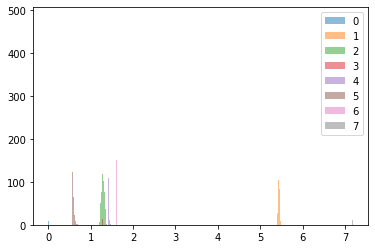

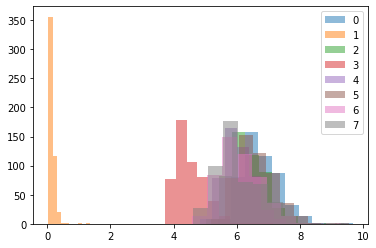

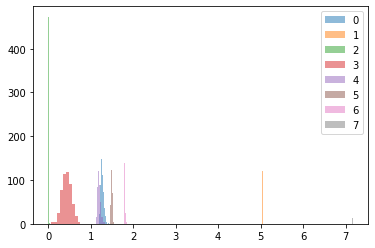

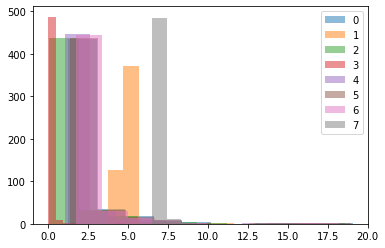

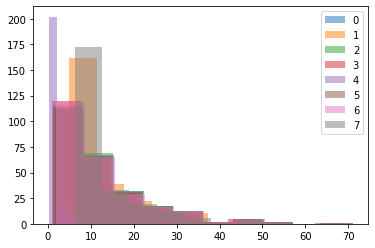

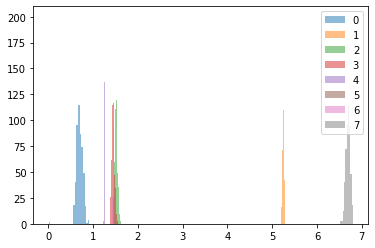

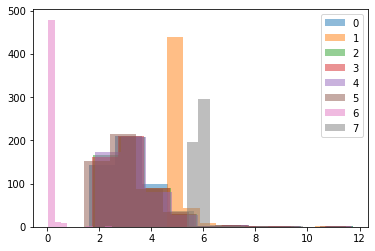

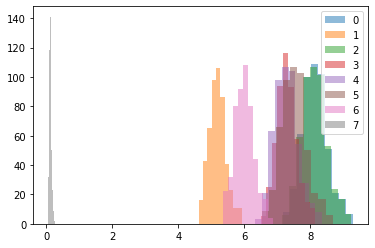

In [16]:
for label, dist_detail in test_class.get_details().items():
    for to, dist in dist_detail.items():
        plt.hist(dist, alpha = .5, label = to)
        plt.legend(loc='upper right')
    plt.show()

In [98]:
def show_plot(norm = True, power = 1/3, num = 8, probScale = "linear", cdfGraph = False, kd_tree = True, test = "biogrid", in_data = data_location_AT,\
             X = None, y = None, decode = True):
    if decode:
        cats = num
        X = []
        y = []
        for i in range(cats):
            x = pd.read_csv(in_data[i], header = None, sep = ' ').iloc[:,:].values
            for b in x:
                X.append(b)
                y.append(i)
        y = np.asarray(y)
    X = customScaling(np.asarray(X), scale = power)
    if norm == 'custom':
        x = customNorm(X)
    else:
        x = normalize(X) if norm else X
    test_class = Distance_classifier(x,y, model = "gamma", kd_tree = kd_tree)
    test_class.fit()
    
    
    def scale(array):
        print(np.sum(array<0))
        print(np.sum(array[np.where(array != np.inf)]))
        return array/np.sum(array[np.where(array != np.inf)])


    test_class.mle(model = "gamma",iterations = 15)
    for graph in ["gamma"]:
        #print("For", graph, "distribution the outcomes are:")
        total = 0
        for key in test_class.get_details():
            #print('for class', key)
        #     print(len(test_class.get_details()[key][key]))
            fig, ax1 = plt.subplots(1, 1)
            points = test_class.get_details()[key][key]
            n, bins, patches = ax1.hist(points, bins = 17)
            print(f'{bins[-2]}: {[b for b in patches][-1].get_height()}')
            ax1.set_ylabel('number', color="tab:red")
            ax1.tick_params(axis='y', labelcolor="tab:red")
            ax1.set_xlabel("distance", color = "black")
            ax1.tick_params(axis = 'x', labelcolor = "black")
            x = np.linspace(0,bins[-1],200)
            if graph == "gamma":
                alpha, theta = test_class.gamma_alphas[key]
    #             print(test_class.gamma_alphas[key])
        #         print(bins)
                rv = sp.stats.gamma(alpha ,scale = theta)
                pdf = rv.pdf(x)
                cdf = rv.cdf(x)
                cdf_in = 1 - rv.cdf(x)
            elif graph == "exp":
                alpha, theta = test_class.gamma_alphas[key]
                print("Alpha and theata are:", alpha, theta)
                print("mean with gamma is is:", theta/alpha)
                test_class.mle(model = "exp",iterations = 15)
                print("mean with exp is:", 1/test_class.lambdas[key])
                Lambda = 1/test_class.lambdas[key]
    #             print("the lambda is:", Lambda)
                pdf = Lambda * np.exp(-Lambda * x)
            '''
            Checking where outliers are
            
            for cla,data in test_class.debug.items():
                max_index = max(data.items(), key=operator.itemgetter(1))[0]
                while max_index - 499 > 0:
                    max_index -= 499
                print(f'maximum for class {cla}: {max_index}')
            '''

            ax2 = ax1.twinx()
    #         pdf = scale(pdf)
            if not cdfGraph:
                ax2.plot(x, pdf)
            else:
                ax2.plot(x, cdf)
                ax2.plot(x, cdf_in)
            ax2.set_yscale(probScale);
        #     print('max of pdf is:', np.max(pdf))
            plt.savefig(f'{test} scale__{power} normalize__{norm} cat__{key} cdf__{cdfGraph} prob__{probScale} kd__{kd_tree}.png')
            
            #print("Lowest p-score is:", 1-rv.cdf(np.max(points)))
            low_pscore = np.sum(1-rv.cdf(points) < 1/np.size(points))
            #print("Points with low p-scores:", low_pscore)
            total += np.sum(1-rv.cdf(points) < 1/np.size(points))
            plt.show()
            plt.close()
        print("P scores less than 1/samples:", total)
        print()
        print()
        print()
        return total
    # print(test_class.gamma_alphas)
# show_plot()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """



For a scaling of 0.001:
6.903736029951698e-05: 1.0


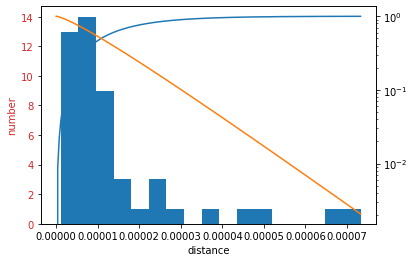

3.779624196474945e-05: 2.0


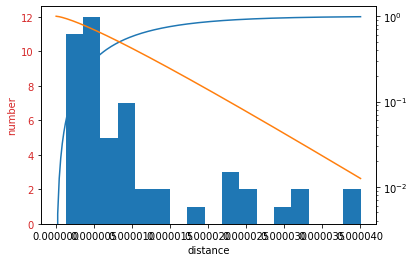

5.197003335629808e-05: 1.0


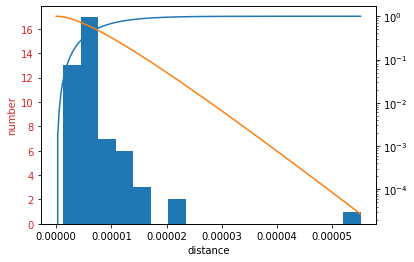

P scores less than 1/samples: 5




For a scaling of 0.0027825594022071257:
0.00019220715033236362: 1.0


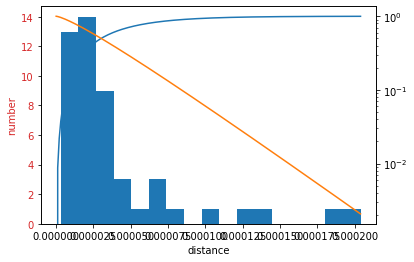

0.00010515566553098891: 2.0


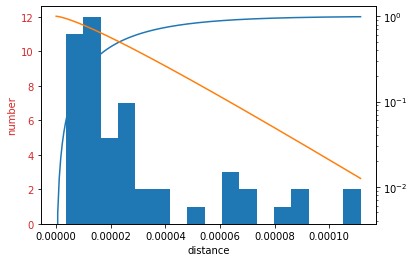

0.00014452758612921586: 1.0


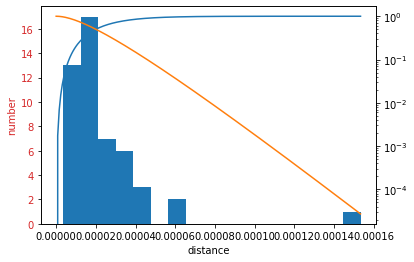

P scores less than 1/samples: 5




For a scaling of 0.007742636826811269:
0.0005356474363865477: 1.0


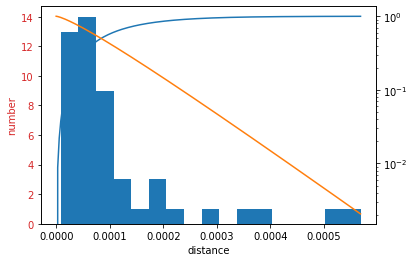

0.0002924877812238327: 2.0


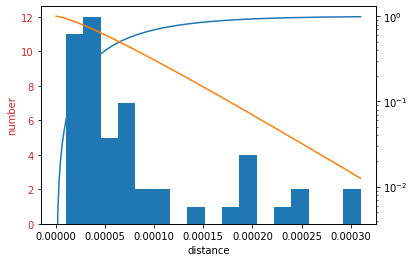

0.00040151604349440045: 1.0


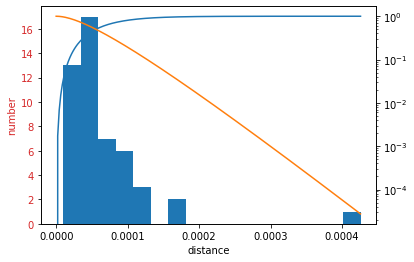

P scores less than 1/samples: 5




For a scaling of 0.021544346900318832:
0.0014966932044252676: 1.0


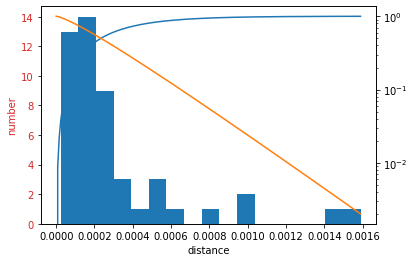

0.0008129623377461461: 2.0


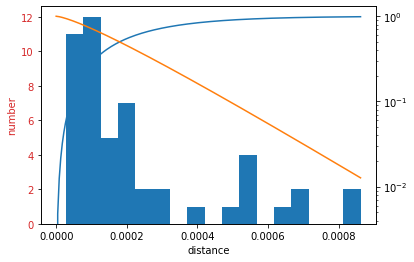

0.0011121820545438772: 1.0


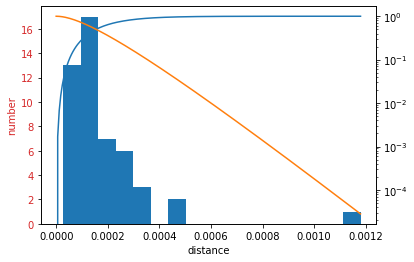

P scores less than 1/samples: 5




For a scaling of 0.05994842503189409:
0.004210101082038143: 1.0


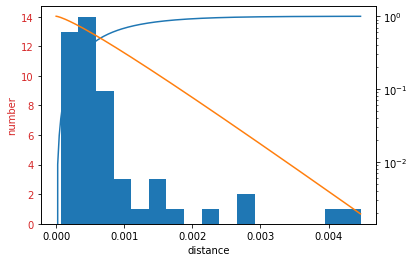

0.0022547390780093476: 2.0


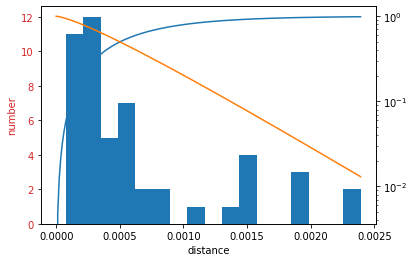

0.0030534476803540525: 1.0


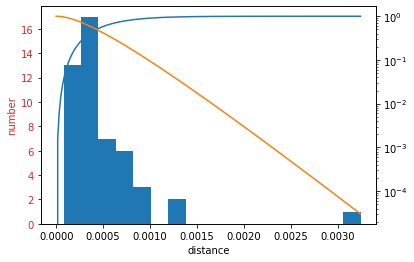

P scores less than 1/samples: 5




For a scaling of 0.1668100537200059:
0.012005840905448196: 1.0


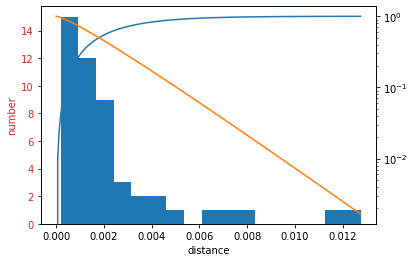

0.006209288258245708: 2.0


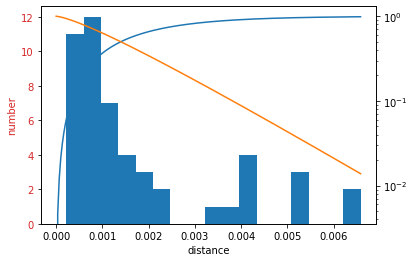

0.008132181297732133: 1.0


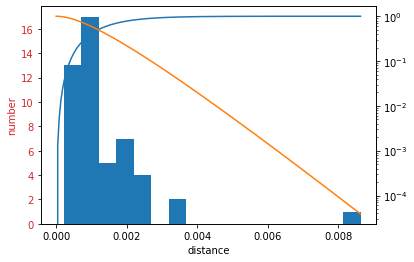

P scores less than 1/samples: 5




For a scaling of 0.46415888336127775:
0.034278394744063766: 1.0


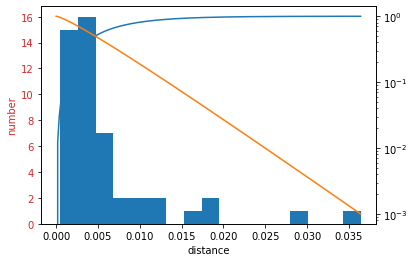

0.016665990233269756: 2.0


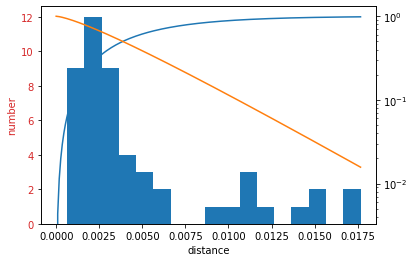

0.019209643253216533: 1.0


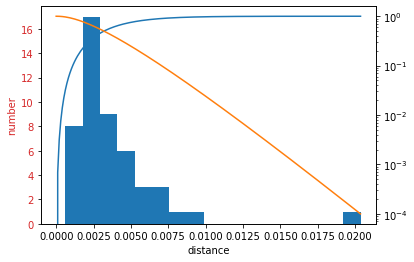

P scores less than 1/samples: 5




For a scaling of 1.2915496650148828:
0.0792483493874384: 1.0


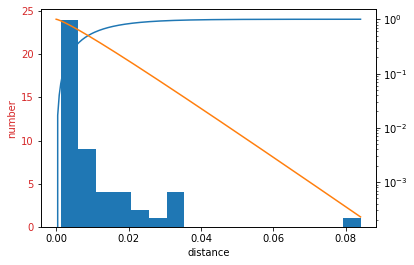

0.04140891880155909: 1.0


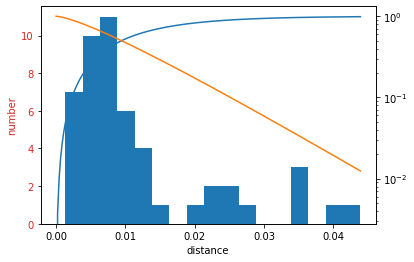

0.028387680643992882: 1.0


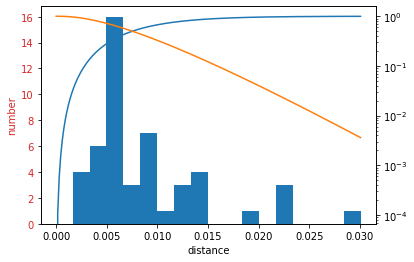

P scores less than 1/samples: 3




For a scaling of 3.593813663804626:
0.06711232916510151: 1.0


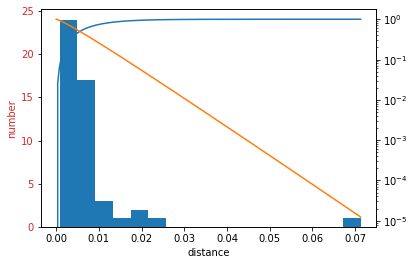

0.059279433245581666: 1.0


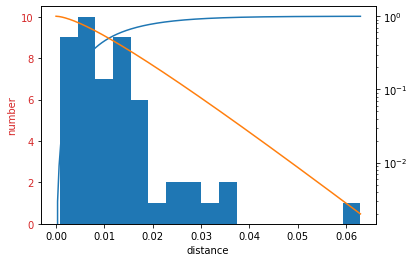

0.05872426699187086: 1.0


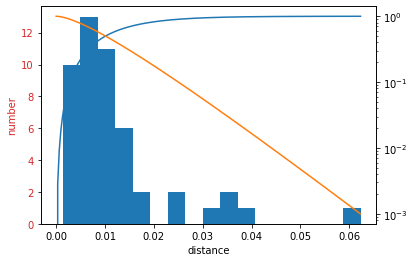

P scores less than 1/samples: 3




For a scaling of 10.0:
0.01602299622461956: 1.0


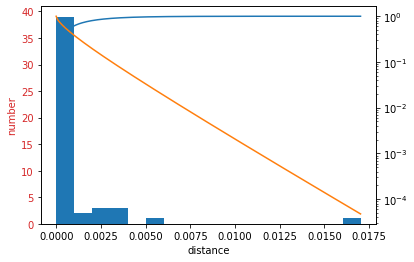

0.03276096982665185: 1.0


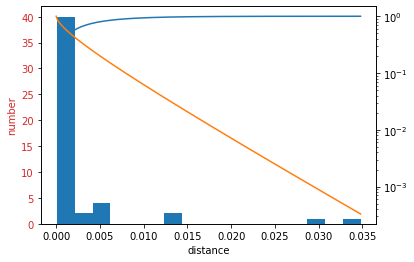

0.13982793726881126: 1.0


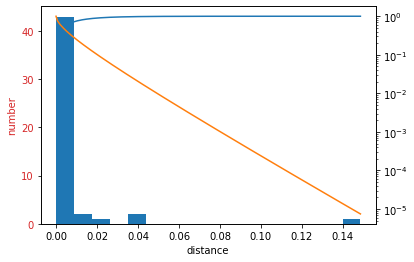

P scores less than 1/samples: 4





In [108]:
scaling = np.logspace(-3, 1, num = 10)
#print(scaling)
outliers = []
iris = r"D:\Tim Huang\Documents\knnNullClassifiers-master\Nearest-Neightbor-Classification\data\Iris Data\iris.txt"
X = pd.read_csv(iris, header = None, sep = '   ').iloc[:,:].values
y = X[:,-1].astype(int)
X = X[:,: -2]

for expo in scaling:
    for normal in [True]:
        print(f'\nFor a scaling of {expo}:')
        show_plot(norm = normal, power = expo, probScale = "log", cdfGraph = True, test = "iris", X = X, y = y, decode = False)

#fig = plt.figure()

#ax = fig.add_subplot()

#ax.plot(scaling, outliers)
#ax.set_xscale('log')

In [18]:
'''
Code under here is for uderstanding tools being used
'''

# b = sp.stats.gamma(.2,scale = .4)
# b.pdf(3)
# print("\n")

sp.stats.gamma(5.547742895875928 ,scale = 3.652029876893275*(10**-5)).cdf(0.00015718448850927371)

0.3340480479292252

[ 1.55098029  1.66091183  1.77084338  1.88077492  1.99070647  2.10063801
  2.21056956  2.32050111  2.43043265  2.5403642   2.65029574  2.76022729
  2.87015883  2.98009038  3.09002192  3.19995347  3.30988502  3.41981656
  3.52974811  3.63967965  3.7496112   3.85954274  3.96947429  4.07940583
  4.18933738  4.29926893  4.40920047  4.51913202  4.62906356  4.73899511
  4.84892665  4.9588582   5.06878974  5.17872129  5.28865284  5.39858438
  5.50851593  5.61844747  5.72837902  5.83831056  5.94824211  6.05817365
  6.1681052   6.27803675  6.38796829  6.49789984  6.60783138  6.71776293
  6.82769447  6.93762602  7.04755756  7.15748911  7.26742066  7.3773522
  7.48728375  7.59721529  7.70714684  7.81707838  7.92700993  8.03694147
  8.14687302  8.25680456  8.36673611  8.47666766  8.5865992   8.69653075
  8.80646229  8.91639384  9.02632538  9.13625693  9.24618847  9.35612002
  9.46605157  9.57598311  9.68591466  9.7958462   9.90577775 10.01570929
 10.12564084 10.23557238 10.34550393 10.45543548 10.

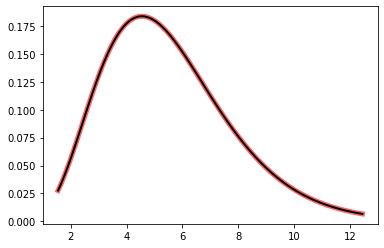

In [19]:
fig, ax = plt.subplots(1, 1)

a = 5.547742895875928
x = np.linspace(sp.stats.gamma.ppf(0.01, a), sp.stats.gamma.ppf(0.99, a), 100)

ax.plot(x, sp.stats.gamma.pdf(x, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')

rv = sp.stats.gamma(a ,3.652029876893275*(10**-5))
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

print(x)

In [9]:
sp.stats.gamma(1.7187e1, scale = 1.9378e-4).cdf(.00233)

0.09422676349084935

Refrences:
1. Thomas P. Minka Estimating a Gamma distribution. https://tminka.github.io/papers/minka-gamma.pdf